# [**시계열 알고리즘 종류**](https://paperswithcode.com/area/time-series)

**"통계추론, 기계학습 및 딥러닝의 흐름에 `시간패턴`을 반영하려 진화"**

**"`지도학습(예측 분류), 비지도학습` 문제에 모두 활용되는 필수 알고리즘"** 

**"`미래 예측을 포함한 추천 서비스와 같은 비즈니스`에 활용중"** 

<img src='./img/TS_Evolution.png' width='900'>

#### 1) 통계추론(Statistical Inference) 알고리즘

- `통계분포`에 기반한 `설명력 중시 알고리즘`

<img src='./img/TS_Algorithm_Concept.png' width='700'>

**(1) 단변량 선형기반:** `Y가 1개` & `Y와 X의 관계를 선형 가정`

- Linear Regression

- `ARIMA(AutoRegressive Integrated Moving Average)`

- `ARIMAX`

- `SARIMAX`

**(2) 다변량 선형기반:** `Y가 2개 이상` & `Y와 X의 관계를 선형 가정`

- Bayesian-based Models

- [`Vector Autoregression(VAR)`](https://en.wikipedia.org/wiki/Vector_autoregression)

- `Vector Error Correction Model(VECM)`

**(3) 비선형기반:** `Y와 X의 관계를 비선형 가정`

- `Exponential Smoothing`

- `ETS(Error/Trend/Seasonal)`

- `Kalman Filter`

- State Space Model

- Change Point Detection(CPD)

- `Autoregressive conditional heteroskedasticity(ARCH)`

- [`Generalized Autoregressive Conditional Heteroskedasticity(GARCH)`](https://en.wikipedia.org/wiki/Autoregressive_conditional_heteroskedasticity)

#### 2) 기계학습/딥러닝 알고리즘

- `컴퓨팅` 기반 `인공지능 알고리즘`으로 `정확성 높은 비선형 관계` 추론

- `Prophet`

- `Neural Prophet`

- `RNN(Recurrent Neural Network)`

- `LSTM(Long Short-Term Memory)`

- `GRU(Gated Recurrent Unit)`

- Neural Networks Autoregression(NNAR)

- Attention

- Self-attention

- Transformer

#### 3) Platforms

- 글로벌 기업들이 독자적으로 개발한 `시계열 분석 플랫폼` 확대중

- [Amazon Forecast](https://aws.amazon.com/ko/forecast/)

- [Automated ML Time-series Forecasting at Microsoft Azure](https://azure.microsoft.com/en-us/blog/build-more-accurate-forecasts-with-new-capabilities-in-automated-machine-learning/)

- [Time Series Forecasting with Google Cloud AI Platform](https://codelabs.developers.google.com/codelabs/time-series-forecasting-with-cloud-ai-platform#0)



In [1]:
# !pip install --user pmdarima

In [3]:
# Auto reload and user defined functions
%reload_ext autoreload
%autoreload 2
from module_regression import *
from module_classification import *
from module_timeseries import *

# Data manipulation and useful functions
import requests
from io import BytesIO
import random
from itertools import product
import scipy as sp

# Time series algorithms
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import AutoARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict


# **종속변수의 정상성(Stationary) 변환**

"`독립변수 X`는 `최대한 다양한 비정상성 패턴을 뽑아 Y를 설명`하려 애썼다면, `종속변수 Y`는 정상성으로 만들어 `최대한 단조롭고 간단하게 만들어 X가 잘 설명할 수 있게 지원!`"

**(1)** (필수는 아니지만) 정상성 확보로 `추정범위가 제한되므로 예측력 향상 가능

**(2)** 단조로운 종속변수라서 적합 모델의 복잡도가 낮아져 `적은 파라미터만으로 모델링` 가능하기에 `Bias` $\uparrow$ + `Variance` $\downarrow$, `과적합 확률이 줄어들고 예측력 향상 가능`

**(3)** 전통적인 `통계추론 알고리즘`은 대부분 `학습 안정성`을 높이기 위해 `정상성 필수`

<img src='./img/DataAnalysis_CycleTS2.png' width='900'>

#### 0) 배경

- 시계열 데이터를 활용한 분석에서는 `새로운 가정 필요`

| **데이터 방향** | **현실 가정** |
|-----|-----|
| **시간 무관 `일반적 데이터`** | `모든 데이터 샘플들이 동일 분포에서 독립적으로 생성` <br> $\rightarrow$ `Independent and Identically Distributed (i.i.d.)` |
| **시간 관련 `시계열 데이터`** | i.i.d.가정 할 수 없고 현실문제를 단순화 한 `새로운 가정 필요` <br> $\rightarrow$ `시간이 흘러도 통계적/확률적 성질이 변하지 않는다는 정상성(Stationary)` |

- 새로운 가정 하에서, 정상성/비정상성 자체를 `라벨로 활용`하여 `분류 지도학습` 및 `군집 비지도학습`에도 활용

#### 1) 정상성의 의미:** 시간이 흘러도 `통계적 특성(Statistical Properties)`이 변하지 않고 `일정`

- **통계적 특성(Statistical Properties):** 주로 `평균(Mean)과 분산(Variance)/공분산(Covariance)`를 의미하지만, 가장 보수적으로는 이를 포함한 `모든 분포적 특성`을 포함

- **[Homoscedasticity](https://en.wikipedia.org/wiki/Homoscedasticity)**: `분산이 일정한(유한한, 발산하지않는) 경우`를 의미

- **[Heteroscedasticity](https://en.wikipedia.org/wiki/Heteroscedasticity)**: `분산이 발산하는 경우`를 의미

<img src='./img/Stationary(on).png' width='300'>
<img src='./img/Stationary(non).png' width='700'>

#### 2) 정상성의 종류

- **변수** 

$$X = {X_{1}, X_{2}, \dots, X_{n}}$$

- **확률과정**

$$Y = {\dots, Y_{-2}, Y_{-1}, Y_{0}, Y_{1}, Y_{2}, \dots}$$
$$X_1 = {\dots, X_{1,-2}, X_{1,-1}, X_{1,0}, X_{1,1}, X_{1,2}, \dots}$$
$$X_2 = {\dots, X_{2,-2}, X_{2,-1}, X_{2,0}, X_{2,1}, X_{2,2}, \dots}$$
$$\dots$$

**(1) 약정상(Weak Stationarity, Wide-sense Stationary Process)**

**(비수학적 이해)** 

1) $..., X_{i,-1}, X_{i,0}, X_{i,-1}$, ... 변수의 `각 시계열 샘플들은 동일 분포`며,

2) ..., $(X_{i,-3}, X_{i,-1}), (X_{i,-2}, X_{i,0}), (X_{i,-1}, X_{i,1})$, ... `임의간격 샘플 2개씩의 묶음`도 `동일 분포`

**(수학적 이해)**  

1) $E(X_{it}) = \mu$, for all time $t$ (The `first moment` estimation) 

2) $Var(X_{it}) = E(X_{it}^2) - E(X_{it})^2 < \infty$, for all time $t$ (The `second moment` estimation)

3) $Cov(X_{is}, X_{ik}) = Cov(X_{i(s+h)}, X_{i(k+h)}) = f(h)$, for all time $s, k, h$ (The `cross moment` estimation) $\Rightarrow$ Covariance just depends on $h$.


**(2) 강정상(Strong Stationarity, Strictly Stationary Process)**  

**"확률과정의 `모든 분포 모멘트(Moment)`가 `시간 차이에만 의존`하는 것(절대시간 미의존)"**

**(비수학적 이해)** 

1) ..., $X_{i,-1}, X_{i,0}, X_{i,-1}$, ... 변수의 `각 시계열 샘플들은 동일 분포`며,

2) ..., $(X_{i,-3}, X_{i,-1}), (X_{i,-2}, X_{i,0}), (X_{i,-1}, X_{i,1})$, ... `임의간격 샘플 2개씩의 묶음`도 `동일 분포`

3) ..., $(X_{i,-5}, X_{i,-3}, X_{i,-1}), (X_{i,-2}, X_{i,0}, X_{i,2}), (X_{i,-1}, X_{i,1}, X_{i,3})$, ... `임의간격 샘플 3개씩의 묶음`도 `동일 분포`

4) $(X_{i,-\infty}, ..., X_{i,-1}, X_{i,1}, X_{i,3}, ..., X_{i,\infty})$ 모든 시간 변화에도 `동일 분포`

**(3) 강정상과 약정상의 관계:** 강정상 $\Rightarrow$ 약정상, but 약정상 $\nRightarrow$ 강정상

**"강정상 $\{x_{it}\}^{t=+\infty}_{t=-\infty}$의 특정 샘플 $\{x_{it}\}^{t={i_2}}_{t={i_1}}$의 `평균과 분산까지만 일정한 약정상` 일 수 있다"**

**"약정상 $\{x_{it}\}^{t=+\infty}_{t=-\infty}$이 3차 이상의 통계적 특성인 `모멘텀(Skewness, Kurtosis 등)`에서도 일정하면 `강정상`이다"** 

#### 3) 백색잡음(White Noise, $WN$)

- `강정상의 대표예시`로 시계열분석 `기본알고리즘 중 가장 중요`함

<img src='./img/White_Noise.png' width='500'>

**(1) 잔차들은 `정규분포`이고, (unbiased) `평균 0과 일정한 분산`을 가져야 함:** 

$$\{\epsilon_t : t = ..., -2, -1, 0, 1, 2, ...\} \sim N(0, \sigma_{\epsilon_t}^2)$$
$$\text{where }\epsilon_{t} \sim i.i.d (\text{independent and identically distributed})$$
$$\epsilon_t = Y_t-\hat{Y}_t,$$
$$E(\epsilon_t)=0,$$
$$Cov(\epsilon_s, \epsilon_k)=0 \text{ for different times!}(s \ne k)$$

**(2) 잔차들이 시간의 흐름에 따라 `상관성이 없어야` 함:** `자기상관함수(Autocorrelation Fundtion, ACF)=0` 확인

- **공분산(Covariance)**

$$Cov(Y_s, Y_k) = E[(Y_s-E(Y_s))(Y_k-E(Y_k))] = \gamma_{s,k}$$

- **자기상관함수(Autocorrelation Function)**

$$Corr(Y_s, Y_k) = \dfrac{Cov(Y_s, Y_k)}{\sqrt{Var(Y_s)Var(Y_k)}} = \dfrac{\gamma_{s,k}}{\sqrt{\gamma_s \gamma_k}}$$

- **편자기상관함수(Partial Autocorrelation Function)** : $s$와 $k$사이의 `상관성을 제거한 자기상관함수`

$$Corr[(Y_s-\hat{Y}_s, Y_{s-t}-\hat{Y}_{s-t})] \text{ for } 1<t<k$$

#### 4) 비정상 확률과정(Non-stationary Process)

- 추세가 있어서 `평균`인 일차 모멘트($E(y_t)$)가 `0이 아니며 시간에 따라 변함`

- 추세가 없지만($E(y_t) = 0$) `분산`인 이차 모멘트($Var(y_t)$)가 `시간에 따라 변함`

- **랜덤 워크(Random Walk):** `비정상(Non-stationary) 대표예시`로 `차분시 백색잡음`으로 변경

$$
\begin{align*}
Y_{it} &= Y_{it-1} + \epsilon_t \\ 
Y_{it} - Y_{it-1} &= \epsilon_t \\ 
\epsilon_t &\sim  N(0,\sigma_{\epsilon_t}^2)
\end{align*}
$$

<img src='./img/Random_Walk.png' width='400'>

#### 5) 정리

| **예시** | **데이터** |
|-----|-----|
| **정상성** | 백색잡음(White Noise) |
| **비정상성** | 랜덤워크(Random Walk) |

- **활용주요목적:**  

    - **모델링:** 시계열 모형은 `데이터가 Stationary라 가정` $\rightarrow$ `Stationary여야 예측 성능 높다`

    - **잔차진단:** `백색잡음 또한 Stationary` $\rightarrow$ `잔차도 Stationary여야 예측 성능 높다` 

- **활용단어예시**

    - Stationary Process: `정상성인 시계열` 데이터셋(프로세스)

    - Stationary Model: `정상성인 시계열데이터를 설명`하는 모델

    - Trend Stationary: `트랜드를 제거하면 정상성`인 시계열데이터

    - Seasonal Stationary: `계절성을 제거하면 정상성`인 시계열데이터

    - Difference Stationary: `차분하면 정상성`인 시계열데이터

## **정상성 변환 방법:** 제곱, 루트, 로그, 차분 등

- **정상성 여부 예시**

<img src='./img/Stationary_Example_Solution.png' width='800'>

| **그림** 	| **데이터 설명** 	|
|-----|-----|
| **(a)** 	| 200일 동안의 구글 주식 가격 	|
| **(b)** 	| 200일 동안의 구글 주식 가격 변동 	|
| **(c)** 	| 미국 연간 파업 수 	|
| **(d)** 	| 미국 단독주택 월별 판매액 	|
| **(e)** 	| 미국 계란12개의 연간 가격 	|
| **(f)** 	| 호주 빅토리아 주의 월별 도살돼지 수 	|
| **(g)** 	| 캐나다 북서부 연간 포획 시라소니 수 	|
| **(h)** 	| 호주 월별 맥주 생산량 	|
| **(i)** 	| 호주 월별 전기 생산량 	|

<img src='./img/Stationary_Example.png' width='800'>

- **Trend:** `a/c/e/f/i`  

- **Seasonality:** `d/h/i`  

- **Non-constant Variance:** `i`  

#### 1) 로그변환(Logarithm Transform) : `분산변화`를 `일정하게` 만듬(i)

- 시간흐름에 비례하여 값이 커지는 경우(`분산 증가`)

- 비정상 확률 과정으로 `표준편차가 자료의 크기에 비례하여 증가`하거나 `지수함수적으로 증가`하는 경우 

- 로그 변환한 확률 과정의 분산은 일정하기에 추세 제거로 기댓값이 0이 되면 `정상 과정으로 모형화 가능`

$$
\begin{align*}
\text{Distribution of Original} && \text{E}(Y_t) &= \mu_t = f(t) \\
&& \sqrt{\text{Var}(Y_t)} &= \mu_t \sigma \\
\text{Distribution of Log-transform} && Y_t &= Y_{t-1} + Y_t - Y_{t-1} \\
&& \dfrac{Y_t}{Y_{t-1}} &= 1 + \dfrac{Y_t - Y_{t-1}}{Y_{t-1}} \\
&& log(\dfrac{Y_t}{Y_{t-1}}) &= log(1 + \dfrac{Y_t - Y_{t-1}}{Y_{t-1}}) \approx \dfrac{Y_t - Y_{t-1}}{Y_{t-1}} \\
&& log(Y_t) - log(Y_{t-1}) &\approx \dfrac{Y_t - Y_{t-1}}{Y_{t-1}} \\
&& log(Y_t) &\approx log(Y_{t-1}) + \dfrac{Y_t - Y_{t-1}}{Y_{t-1}} \\
&& log(Y_t) &\approx log(\mu_t) + \dfrac{Y_t - \mu_t}{\mu_t} \\
&& \text{E}(\log Y_t) &= \log \mu_t \\
&& \text{Var}(\log Y_t) &\approx \sigma^2 \\
% \text{*Generalization of Return} && R_t &= \dfrac{Y_{t}}{Y_{t-1}} - 1 \\
% && \log{Y_t} - \log{Y_{t-1}} &= \log{R_t + 1} \approx R_t \;\; \text{ if } \left| R_t \right| < 0.2 \\
\end{align*}
$$


#### 2) 차분(Difference): `평균변화`를 `일정하게`만들어 `추세나 계절성 제거/감소` 가능

**(1) 계절성(Seasonality, $S_t$)**: 특정한 `시간(월/요일)`에 따라 `평균이 달라지는 것`을 의미하고 `더미변수`를 통해 `각 시간(월/요일)별 평균 추정` 가능

- **계절성 제거1(별도추정):** 별도의 `계절성 함수 추정`($f(t)$) 후 `함수 제거`를 통한 정상성 확보

    - **계절성 제거1(별도추정):** 별도의 `계절성 함수 추정`($f(t)$) 후 `함수 제거`를 통한 정상성 확보

    - 확률과정의 `시간값의 더미변수화`를 통해 `각 시간별 평균 함수`를 알아내는 것

    - 확률과정($Y_t$)이 `추정 가능한 결정론적 계절성함수`($f(t)$)와 `정상확률과정`($Y^s_t$)의 `합`

\begin{align*}
\text{Main Equation} && Y_t &= f(t) + Y^s_t \\
\text{where} && f(t) &= \sum_{i=0}^{\infty} a_i D_i = a_0 + a_1 D_1 + a_2 D_2 + \cdots
\end{align*}

- **계절성 제거2(차분사용):** `차분 적용` $(1-L^d) Y_t$ 후 `계절성 제거`를 통한 정상성 확보

\begin{align*}
\text{Main Equation of d=1} && Y_t &=> (1-L^1) Y_t \\
&& &= (1-Lag^1) Y_t \\
&& &= Y_t - Lag^1(Y_t) \\
&& &= Y_t - Y_{t-1} \\
\text{Main Equation of d=2} && Y_t &=> (1-L^2) Y_t \\
&& &= (1-Lag^2) Y_t \\
&& &= Y_t - Lag^2(Y_t) \\
&& &= Y_t - Y_{t-2} \\
\end{align*}


**(2) 추세(Trend, $T_t$)**: 시간 흐름에 따라 `증가 또는 감소`하는 경우  

- **추세 제거1(별도추정):** 별도의 `추세 추정`($f(t)$) 후 `함수 제거`를 통한 정상성 확보

    - 확률과정의 `추세 모델링`을 통해 `각 시간별 평균 함수`를 알아내는 것

    - 확률과정($Y_t$)이 `추정이 가능한 결정론적 추세함수`($f(t)$)와 `정상확률과정`($Y^s_t$)의 `합`

\begin{align*}
\text{Main Equation} && Y_t &= f(t) + Y^s_t \\
\text{where} && f(t) &= \sum_{i=0}^{\infty} a_i t^i = a_0 + a_1 t + a_2 t^2 + \cdots
\end{align*}

- **추세 제거2(차분사용):** `차분 적용` $(1-L^1)^d Y_t$ 후 `추세 제거`를 통한 정상성 확보

\begin{align*}
\text{Main Equation of d=1} && Y_t &=> (1-L^1)^1 Y_t \\
&& &= (1-Lag^1)^1 Y_t \\
&& &= Y_t - Lag^1(Y_t) \\
&& &= Y_t - Y_{t-1} \\
\text{Main Equation of d=2} && Y_t &=> (1-L^1)^2 Y_t \\
&& &= (1-2L^1+L^2) Y_t \\
&& &= (1-2Lag^1+Lag^2) Y_t \\
&& &= Y_t - 2Lag^1(Y_t) + Lag^2(Y_t) \\
&& &= Y_t - Lag^1(Y_t) - Lag^1(Y_t) + Lag^2(Y_t) \\
&& &= (Y_t - Lag^1(Y_t)) - (Lag^1(Y_t) - Lag^2(Y_t)) \\
&& &= (Y_t - L^1(Y_t)) - (L^1(Y_t) - L^2(Y_t)) \\
&& &= (Y_t - Y_{t-1}) - (Y_{t-1} - Y_{t-2}) \\
&& &= Y_t - 2Y_{t-1} + Y_{t-2} \\
\end{align*}



#### 3) Box-Cox 변환: 비정규분포 데이터를 `정규분포 변환`하여 `극단값으로 인한 비정상성` 확률 낮춤

- 일반적으로 `비정규분포에서 추세나 계절성 등의 큰변동이 발생` 가능(b vs i)

- `모수(parameter)` $\lambda$를 가지며, 보통 여러가지 $\lambda$ 값을 모두 시도하여 `가장 정규성이 높은 데이터가 출력되는 모수를 추정`하여 변환된 정규분포 데이터를 사용

$$
\begin{align*}
y^{(\boldsymbol{\lambda})} =
\begin{cases}
\dfrac{y^{\lambda} - 1}{\lambda} & \text{if } \lambda \neq 0, \\
\ln{y} & \text{if } \lambda = 0,
\end{cases}
\end{align*}
$$

## **추세제거 실습:** 대기중 CO2농도

,time,co2
0,0,316.10
1,1,317.30
2,2,317.60
3,3,317.50
4,4,316.40


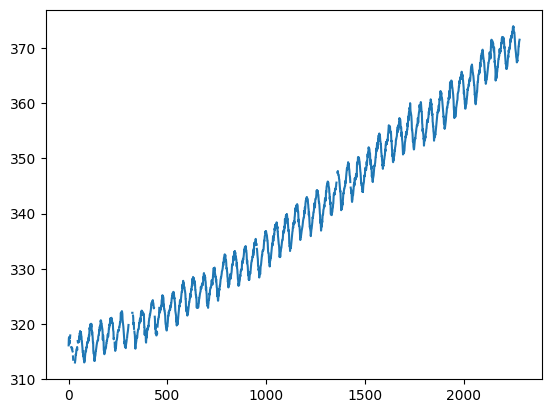

In [4]:
# 데이터 로딩

co2 = sm.datasets.co2.load()
df = pd.DataFrame.from_records(co2.data).iloc[:, [-1]]
df = df.reset_index()
df.columns = ['time', 'co2']
display(df.head())

plt.plot(df.time, df.co2)
plt.show()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    co2   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                 8.220e+04
Date:                Sat, 29 Apr 2023   Prob (F-statistic):               0.00
Time:                        20:52:31   Log-Likelihood:                -5414.9
No. Observations:                2225   AIC:                         1.083e+04
Df Residuals:                    2223   BIC:                         1.085e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    310.2080      0.120   2591.940      0.000     309.973     310.443
time           0.0257   8.98e-05    286.710      0.000       0.026       0.026
==============================================================================
Omnibus:                       58.527   Durbin-Watson:                   0.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.719
Skew:                           0.117   Prob(JB):                     7.86e-08
Kurtosis:                       2.454   Cond. No.                     2.73e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

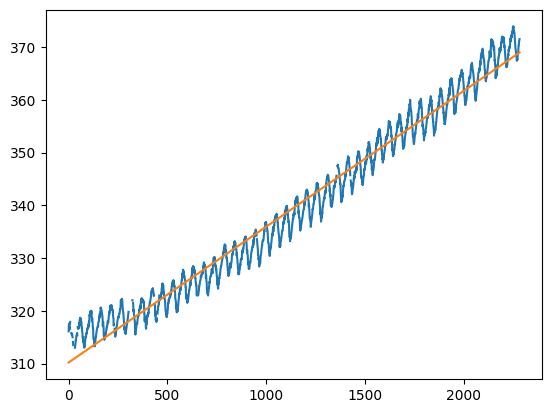

In [5]:
# 데이터 확인 및 추세 추정 (선형)
result = sm.OLS.from_formula(formula='co2~time', data=df).fit()
display(result.summary())

trend = result.params[0] + result.params[1] * df.index
plt.plot(df.time, df.co2, df.time, trend)
plt.show()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    co2   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 6.457e+04
Date:                Sat, 29 Apr 2023   Prob (F-statistic):               0.00
Time:                        20:56:49   Log-Likelihood:                -4922.6
No. Observations:                2225   AIC:                             9851.
Df Residuals:                    2222   BIC:                             9868.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      314.1037      0.147   2143.355      0.000     313.816     314.391
time             0.0158      0.000     54.458      0.000       0.015       0.016
I(time ** 2)   4.29e-06   1.22e-07     35.169      0.000    4.05e-06    4.53e-06
==============================================================================
Omnibus:                      296.943   Durbin-Watson:                   0.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.609
Skew:                          -0.091   Prob(JB):                     1.40e-17
Kurtosis:                       2.103   Cond. No.                     7.38e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.38e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

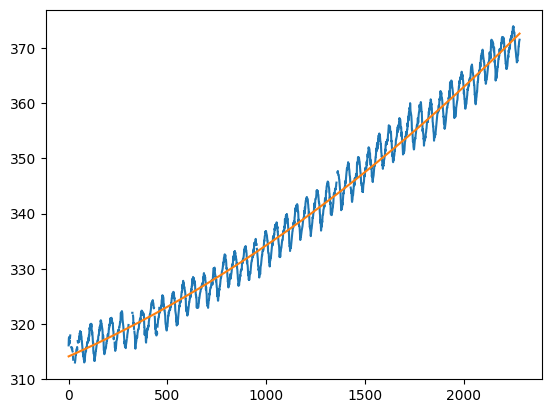

In [10]:
# 데이터 확인 및 추세 추정 (비선형)
result = sm.OLS.from_formula(formula='co2~time+I(time**2)', data=df).fit()
display(result.summary())

trend = result.params[0] + result.params[1] * df.time + result.params[2] * df.time ** 2
plt.plot(df.time, df.co2, df.time, trend)
plt.show()

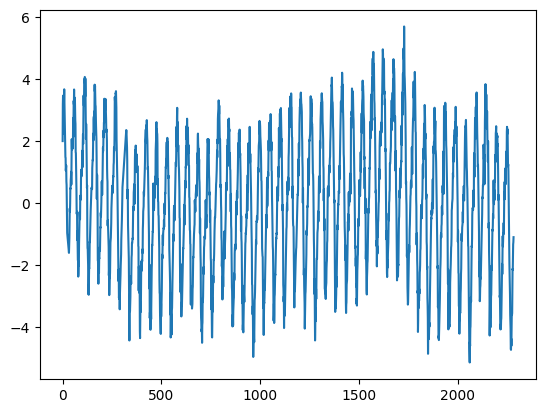

H0 of ADF:  비정상상태
H0 of KPSS:  정상상태


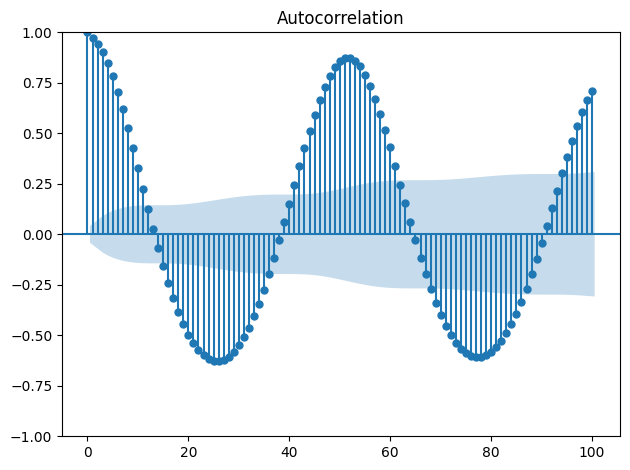

In [12]:
# 추세 제거 및 정상성 확인
## 방법1
plt.plot(result.resid)
plt.show()

print('H0 of ADF: ', '비정상상태')
print('H0 of KPSS: ', '정상상태')
# display(stationarity_ADF_KPSS(pd.DataFrame(result.resid)))

plot_acf(result.resid, lags=100, use_vlines=True)
plt.tight_layout()
plt.show()

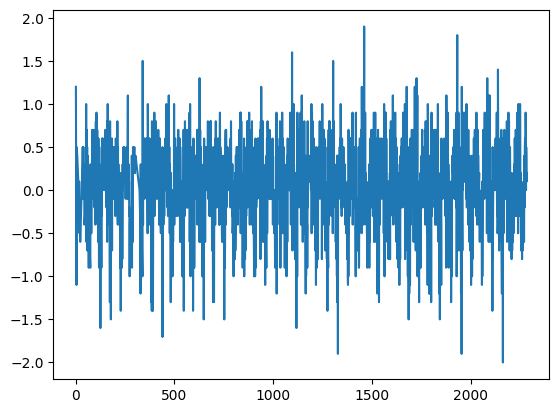

H0 of ADF:  비정상상태
H0 of KPSS:  정상상태


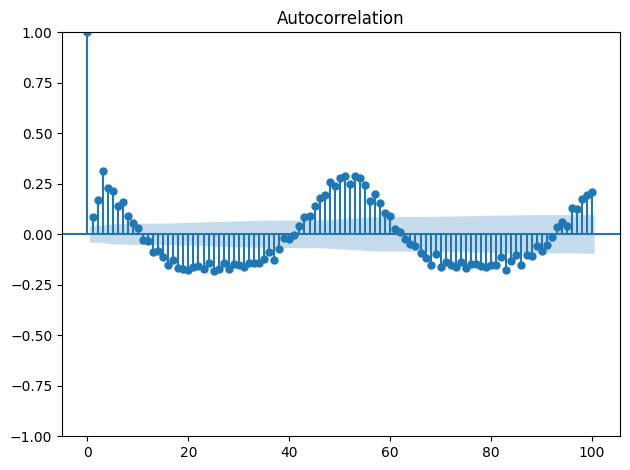

In [13]:
# 추세 제거 및 정상성 확인
## 방법2
plt.plot(df.co2.diff(1).dropna())
plt.show()

print('H0 of ADF: ', '비정상상태')
print('H0 of KPSS: ', '정상상태')
# display(stationarity_ADF_KPSS(pd.DataFrame(df.co2.diff(1).dropna())))

plot_acf(df.co2.diff(1).dropna(), lags=100, use_vlines=True)
plt.tight_layout()
plt.show()

| **방법론** | **효과** | **CO2 농도<br>(회귀분석 추세제거)** | **CO2 농도<br>(차분 추세제거)** |
|-----|-----|-----|-----|
| **ADF Test<br>(H0: `비정상성`)** | 추세 제거 | `정상성` | `정상성` |
| **KPSS Test<br>(H0: `정상성`)** | 계절성 제거 | `정상성` | `정상성` |
| **ACF Plot** | 자기상관 제거 | 비정상성 | (덜)비정상성 |

## **계절성제거 실습:** 호흡기질환 사망자수

In [18]:
# 데이터 로딩
# deaths = sm.datasets.get_rdataset("deaths", package="MASS")
# df = deaths.data
location = os.path.join('.', 'data', 'deaths_MASS.csv')
df = pd.read_csv(location)
df.columns = ['time', 'value']
df

,time,value
0,"1,974.00",3035
1,"1,974.08",2552
2,"1,974.17",2704
3,"1,974.25",2554
4,"1,974.33",2014
...,...,...
67,"1,979.58",1354
68,"1,979.67",1333
69,"1,979.75",1492
70,"1,979.83",1781


In [20]:
# 시간변수 추출
df.time = pd.date_range('1974-01-01', periods=len(df), freq='M')
df['month'] = df.time.dt.month
df

,time,value,month
0,1974-01-31,3035,1
1,1974-02-28,2552,2
2,1974-03-31,2704,3
3,1974-04-30,2554,4
4,1974-05-31,2014,5
...,...,...,...
67,1979-08-31,1354,8
68,1979-09-30,1333,9
69,1979-10-31,1492,10
70,1979-11-30,1781,11


,time,value,month
67,1979-08-31,1354,8
68,1979-09-30,1333,9
69,1979-10-31,1492,10
70,1979-11-30,1781,11
71,1979-12-31,1915,12


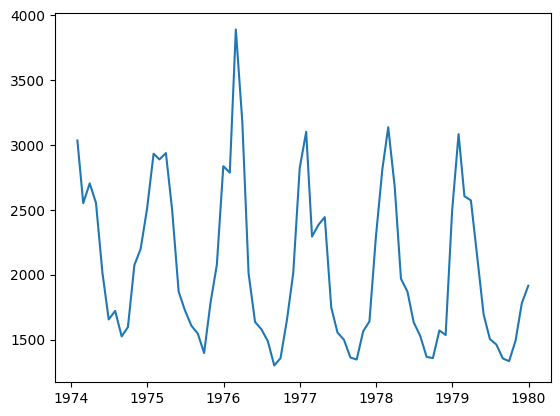

H0 of ADF:  비정상상태
H0 of KPSS:  정상상태


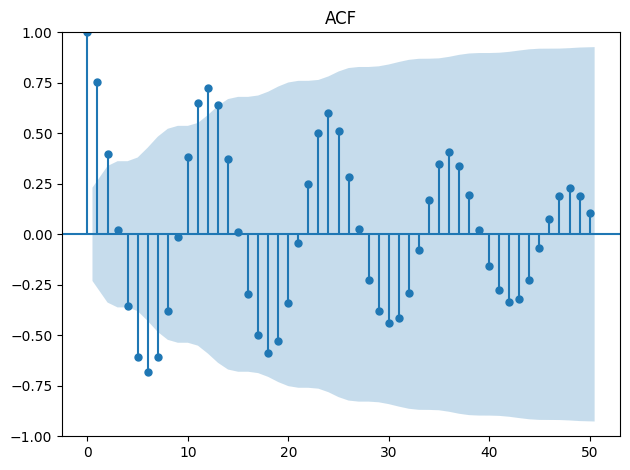

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     31.66
Date:                Sat, 29 Apr 2023   Prob (F-statistic):           6.55e-21
Time:                        23:05:12   Log-Likelihood:                -494.38
No. Observations:                  72   AIC:                             1013.
Df Residuals:                      60   BIC:                             1040.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(month)[1]   2959.3333    103.831     28.502      0.000    2751.641    3167.025
C(month)[2]   2894.6667    103.831     27.879      0.000    2686.975    3102.359
C(month)[3]   2743.0000    103.831     26.418      0.000    2535.308    2950.692
C(month)[4]   2269.6667    103.831     21.859      0.000    2061.975    2477.359
C(month)[5]   1805.1667    103.831     17.386      0.000    1597.475    2012.859
C(month)[6]   1608.6667    103.831     15.493      0.000    1400.975    1816.359
C(month)[7]   1550.8333    103.831     14.936      0.000    1343.141    1758.525
C(month)[8]   1408.3333    103.831     13.564      0.000    1200.641    1616.025
C(month)[9]   1397.3333    103.831     13.458      0.000    1189.641    1605.025
C(month)[10]  1690.0000    103.831     16.277      0.000    1482.308    1897.692
C(month)[11]  1874.0000    103.831     18.049      0.000    1666.308    2081.692
C(month)[12]  2478.5000    103.831     23.871      0.000    2270.808    2686.192
==============================================================================
Omnibus:                       19.630   Durbin-Watson:                   1.374
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.630
Skew:                           0.787   Prob(JB):                     1.67e-11
Kurtosis:                       6.750   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

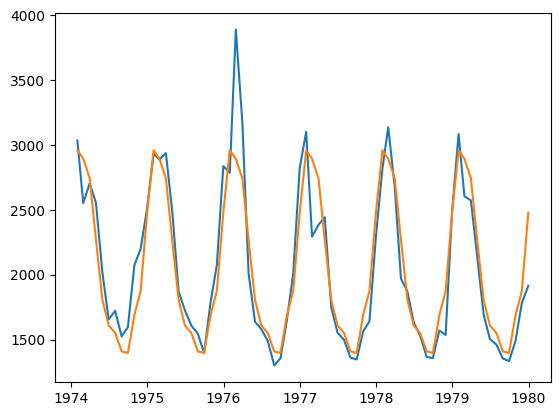

In [22]:
# 데이터 확인 및 추세 추정
display(df.tail())
plt.plot(df.time, df.value)
plt.show()

print('H0 of ADF: ', '비정상상태')
print('H0 of KPSS: ', '정상상태')
# display(stationarity_ADF_KPSS(pd.DataFrame(df.value)))
plot_acf(df.value, lags=50, use_vlines=True, title='ACF')
plt.tight_layout()
plt.show()

result = sm.OLS.from_formula(formula='value ~ C(month) - 1', data=df).fit()
display(result.summary())

plt.plot(df.time, df.value, df.time, result.fittedvalues)
plt.show()

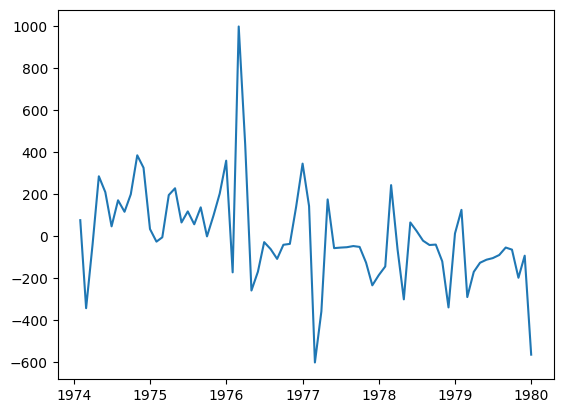

H0 of ADF:  비정상상태
H0 of KPSS:  정상상태


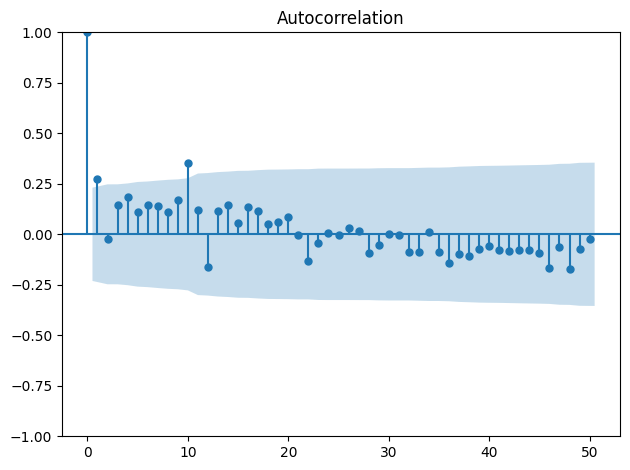

In [23]:
# 추세 제거 및 정상성 확인
## 방법1
plt.plot(df.time, result.resid)
plt.show()

print('H0 of ADF: ', '비정상상태')
print('H0 of KPSS: ', '정상상태')
# display(stationarity_ADF_KPSS(pd.DataFrame(result.resid)))

plot_acf(result.resid, lags=50, use_vlines=True)
plt.tight_layout()
plt.show()

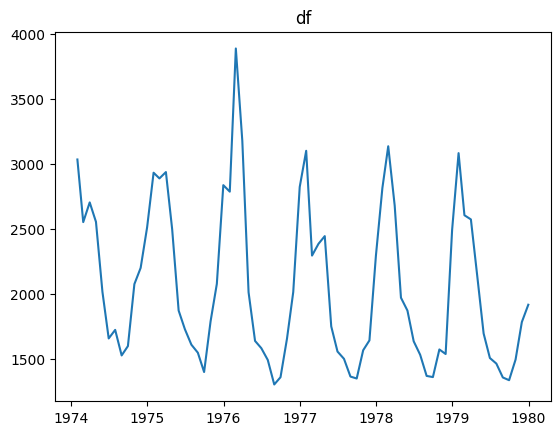

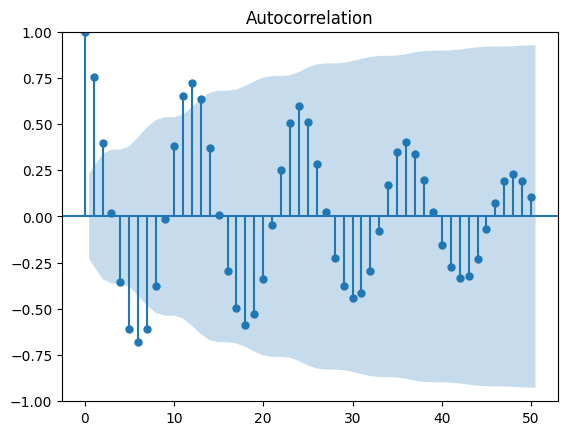

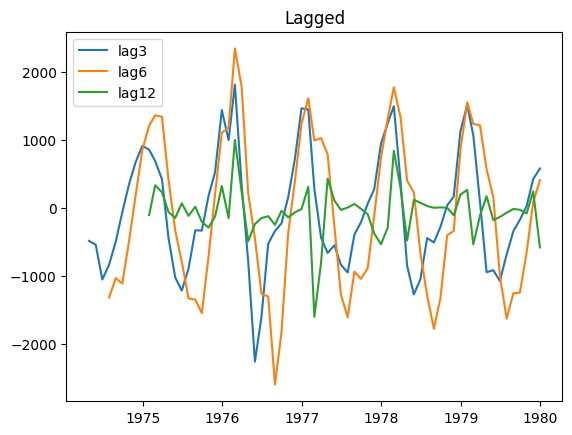

H0 of ADF:  비정상상태
H0 of KPSS:  정상상태


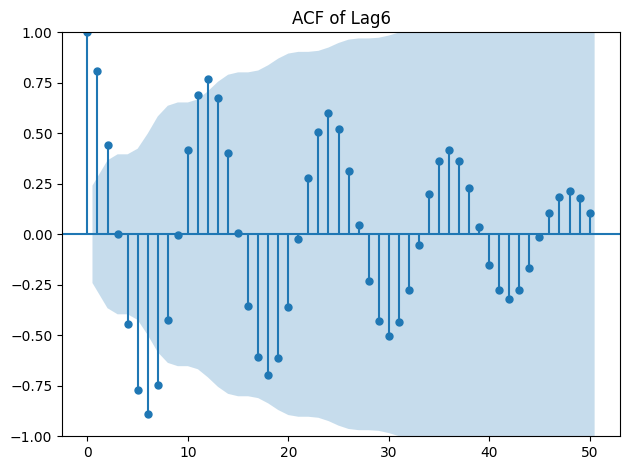

H0 of ADF:  비정상상태
H0 of KPSS:  정상상태


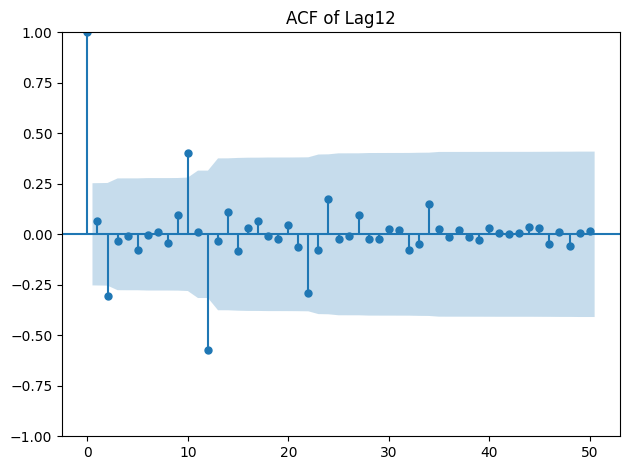

In [25]:
# 계절성 제거 및 정상성 확인
## 방법2
plt.plot(df.time, df.value)
plt.title('df')
plt.show()
plot_acf(df.value, lags=50, use_vlines=True)
plt.show()

seasonal_lag = 3
plt.plot(df.time[seasonal_lag:], df.value.diff(seasonal_lag).dropna(), label='lag{}'.format(seasonal_lag))
seasonal_lag = 6
plt.plot(df.time[seasonal_lag:], df.value.diff(seasonal_lag).dropna(), label='lag{}'.format(seasonal_lag))
seasonal_lag = 12
plt.plot(df.time[seasonal_lag:], df.value.diff(seasonal_lag).dropna(), label='lag{}'.format(seasonal_lag))
plt.title('Lagged')
plt.legend()
plt.show()

seasonal_lag = 6
print('H0 of ADF: ', '비정상상태')
print('H0 of KPSS: ', '정상상태')
# display(stationarity_ADF_KPSS(pd.DataFrame(df.value.diff(seasonal_lag).dropna())))
plot_acf(df.value.diff(seasonal_lag).dropna(), lags=50, 
         use_vlines=True, title='ACF of Lag{}'.format(seasonal_lag))
plt.tight_layout()
plt.show()

seasonal_lag = 12
print('H0 of ADF: ', '비정상상태')
print('H0 of KPSS: ', '정상상태')
# display(stationarity_ADF_KPSS(pd.DataFrame(df.value.diff(seasonal_lag).dropna())))
plot_acf(df.value.diff(seasonal_lag).dropna(), lags=50,
         use_vlines=True, title='ACF of Lag{}'.format(seasonal_lag))
plt.tight_layout()
plt.show()

| **방법론** | **효과** | **호흡기 사망자수** | **호흡기 사망자수<br>(회귀분석 계절성제거)** | **호흡기 사망자수<br>(Lag6 차분 계절성제거)** | **호흡기 사망자수<br>(Lag12 차분 계절성제거)** |
|-----|-----|-----|-----|-----|-----|
| **ADF Test<br>(H0: `비정상성`)** | 추세 제거 | 비정상성 | `정상성` | `정상성` | 비정상성 |
| **KPSS Test<br>(H0: `정상성`)** | 계절성 제거 | `정상성` | 비정상성 | `정상성` | `정상성` |
| **ACF Plot** | 자기상관 제거 | 비정상성 | `정상성` | 비정상성 | `정상성` |

## **차분변환 실습:** 랜덤워크/백색잡음

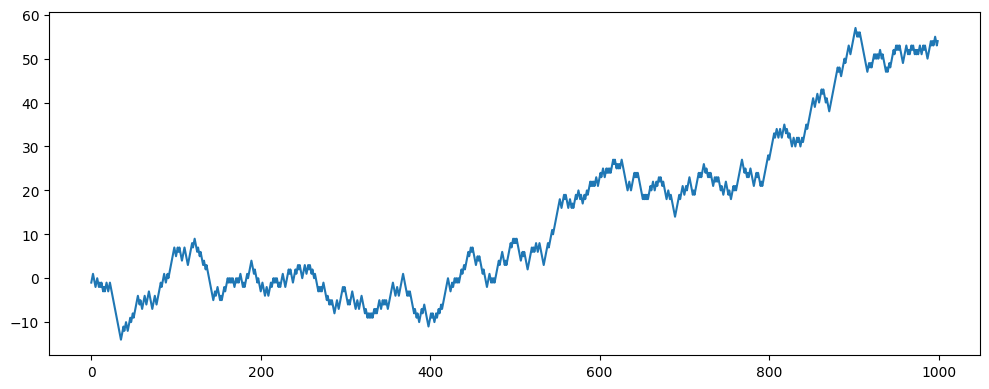

'Before a difference'

H0 of ADF:  비정상상태
H0 of KPSS:  정상상태


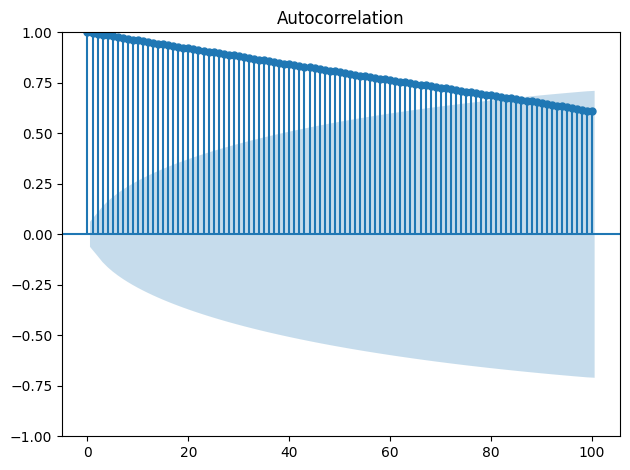

'After a difference'

H0 of ADF:  정상상태
H0 of KPSS:  정상상태


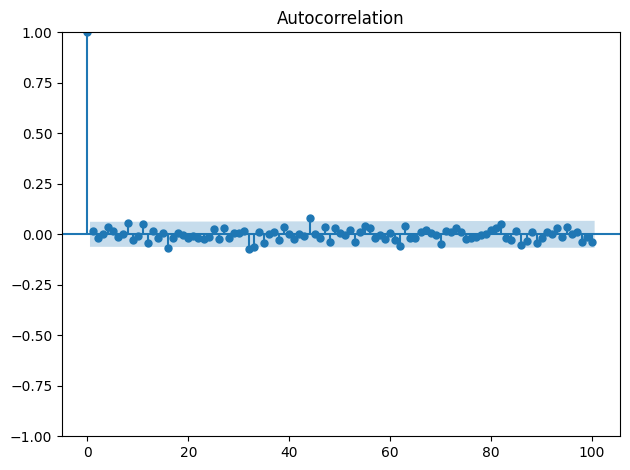

In [26]:
# 랜덤워크 데이터 생성
plt.figure(figsize=(10, 4))
random.seed(1)
random_walk = [-1 if random.random() < 0.5 else 1]
for i in range(1, 1000):
    white_noise = -1 if random.random() < 0.5 else 1
    value = random_walk[i-1] + white_noise
    random_walk.append(value)
plt.plot(random_walk)
plt.tight_layout()
plt.show()

# 차분 전 랜덤워크 정상성 테스트
display('Before a difference')
print('H0 of ADF: ', '비정상상태')
print('H0 of KPSS: ', '정상상태')
# display(stationarity_ADF_KPSS(pd.DataFrame(random_walk)))
plot_acf(random_walk, lags=100, use_vlines=True)
plt.tight_layout()
plt.show()

# 차분 후 랜덤워크 정상성 테스트
display('After a difference')
print('H0 of ADF: ', '정상상태')
print('H0 of KPSS: ', '정상상태')
# display(stationarity_ADF_KPSS(pd.DataFrame(pd.Series(random_walk).diff(1).dropna())))
plot_acf(pd.Series(random_walk).diff(1).dropna(), lags=100, use_vlines=True)
plt.tight_layout()
plt.show()

| **방법론** | **효과** | **랜덤 워크** | **랜덤 워크(차분후)** |
|-----|-----|-----|-----|
| **ADF Test<br>(H0: `비정상성`)** | 추세 제거 | 비정상성 | `정상성` |
| **KPSS Test<br>(H0: `정상성`)** | 계절성 제거 | 비정상성 | `정상성` |
| **ACF Plot** | 자기상관 제거 | 비정상성 | `정상성` |

H0 of ADF:  비정상상태


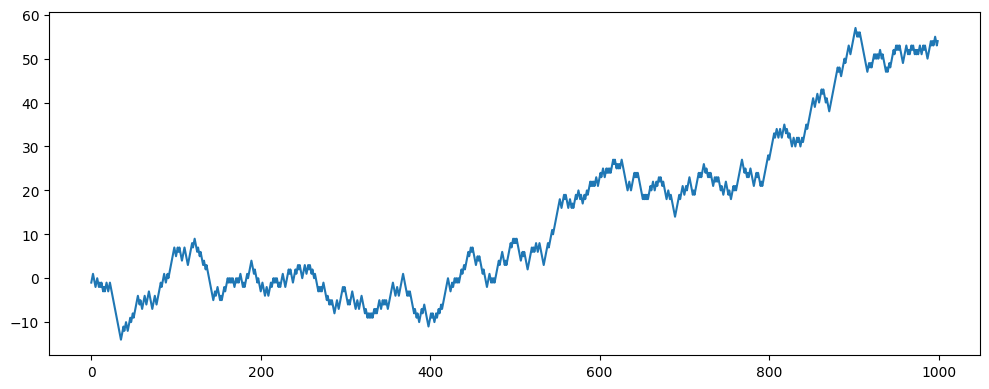

In [27]:
# 랜덤워크 데이터 생성 및 통계량 Test
# rho 값을 변화키면서 언제 비정상이 되는지 파악?
# 정상성의 계수 범위 추론 가능!
plt.figure(figsize=(10, 4))
random.seed(1)
rho = 1    # 0.3, 0.6, 0.9, 1
random_walk = [-1 if random.random() < 0.5 else 1]
for i in range(1, 1000):
    white_noise = -1 if random.random() < 0.5 else 1
    value = rho * random_walk[i-1] + white_noise
    random_walk.append(value)
plt.plot(random_walk)

print('H0 of ADF: ', '비정상상태')
# plt.title('Rho: {}\n ADF p-value: {}'.format(rho, stationarity_ADF_KPSS(pd.DataFrame(random_walk)).T['p-value'][0]))
plt.tight_layout()
plt.show()

## **정규분포변환 실습:** 항공사 승객수요

Optimal Lambda:  0.14802265137037945


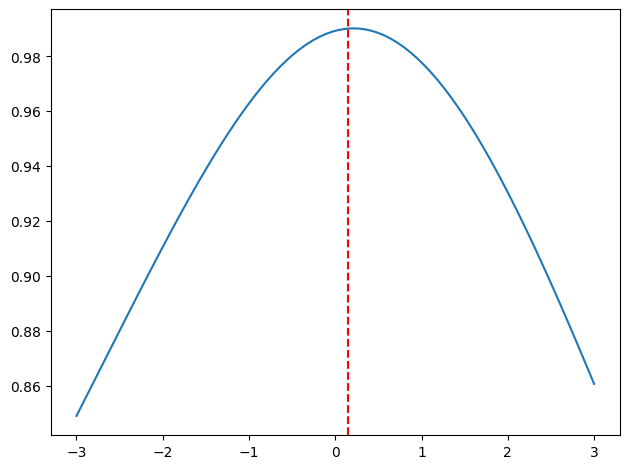

In [28]:
# 데이터 준비
data = sm.datasets.get_rdataset('AirPassengers')
df = data.data.copy()

# Box-Cox 변환 모수 추정
# 정규분포의 특정 범위(x)에서 lambda를 바꿔가며 정규성(measure:y)이 가장 높은 lambda(l_opt)를 선정
x, y = sp.stats.boxcox_normplot(df.value, la=-3, lb=3)
y_transfer, l_opt = sp.stats.boxcox(df.value)
print('Optimal Lambda: ', l_opt)

plt.plot(x, y)
plt.axvline(x=l_opt, color='r', ls='--')
plt.tight_layout()
plt.show()

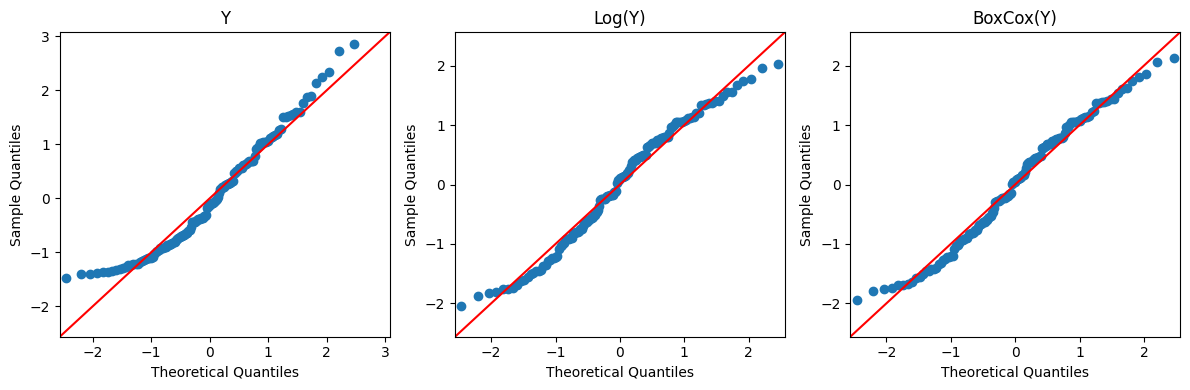

In [29]:
# 변환 전후에 따른 결과 차이 확인
plt.figure(figsize=(12, 4))
sm.qqplot(df.value, fit=True, line='45', ax=plt.subplot(131))
plt.title('Y')
sm.qqplot(np.log(df.value), fit=True, line='45', ax=plt.subplot(132))
plt.title('Log(Y)')
sm.qqplot(y_transfer, fit=True, line='45', ax=plt.subplot(133))
plt.title('BoxCox(Y)')
plt.tight_layout()
plt.show()

## **분산/추세/계절성처리 실습:** 항공사 승객수요

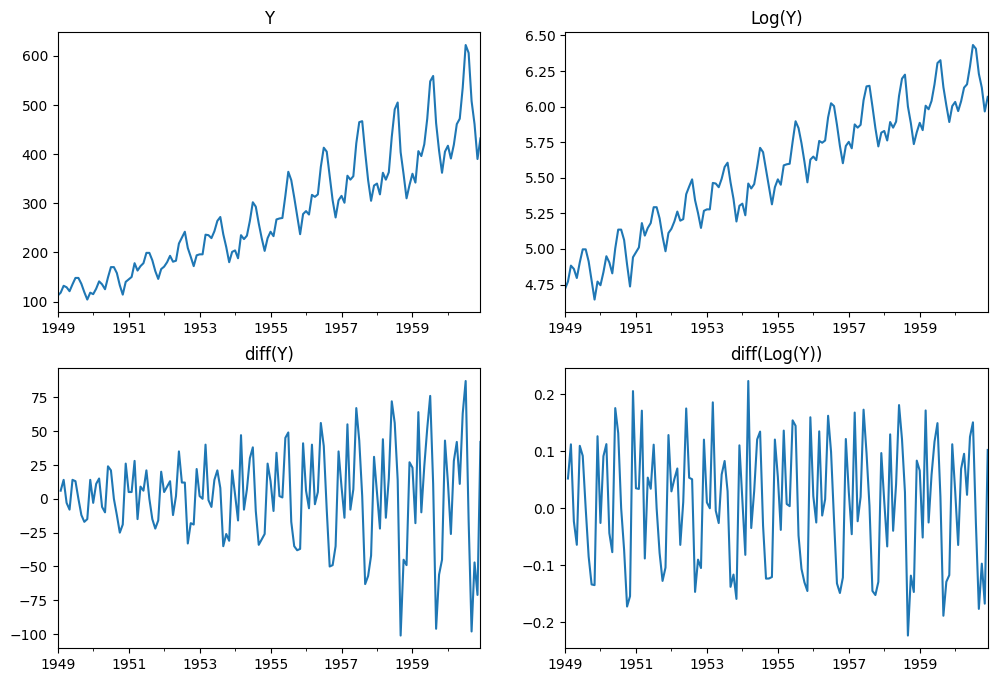

In [30]:
# 데이터 준비
data = sm.datasets.get_rdataset('AirPassengers')
df = data.data.copy()

# 데이터 전처리
## 시간 인덱싱
if 'time' in df.columns:
    df.index = pd.date_range(start='1/1/1949', periods=len(df['time']), freq='M')
    del df['time']

## 정상성 확보
plt.figure(figsize=(12, 8))
df.plot(ax=plt.subplot(221), title='Y', legend=False)
np.log(df).plot(ax=plt.subplot(222), title='Log(Y)', legend=False)
df.diff(1).plot(ax=plt.subplot(223), title='diff(Y)', legend=False)
np.log(df).diff(1).plot(ax=plt.subplot(224), title='diff(Log(Y))', legend=False)
plt.show()

'Non-transfer:'

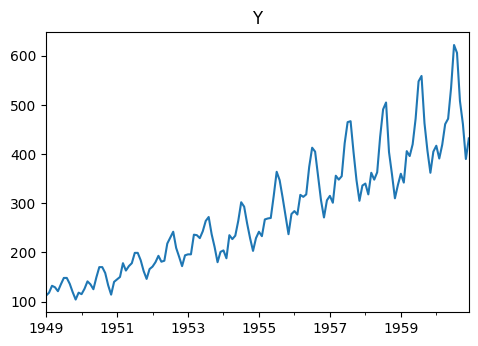

H0 of ADF:  비정상상태
H0 of KPSS:  정상상태


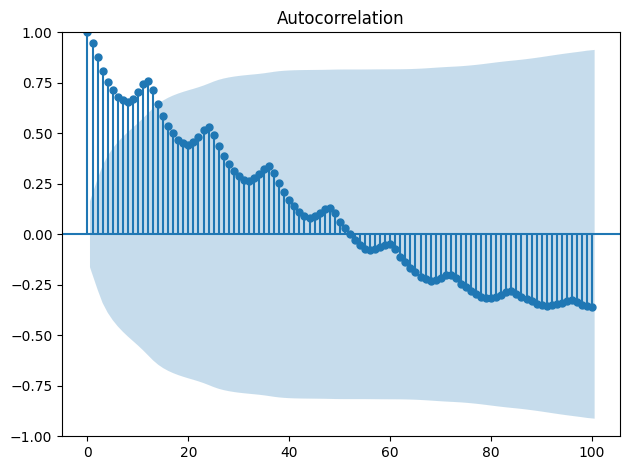

'Log-transfer:'

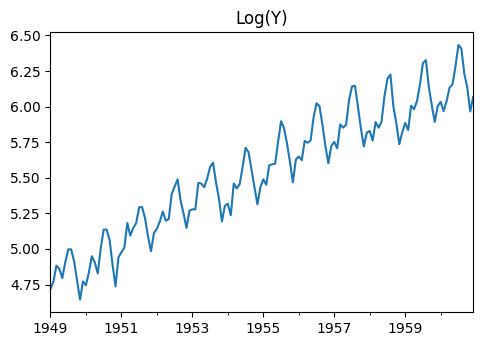

H0 of ADF:  비정상상태
H0 of KPSS:  정상상태


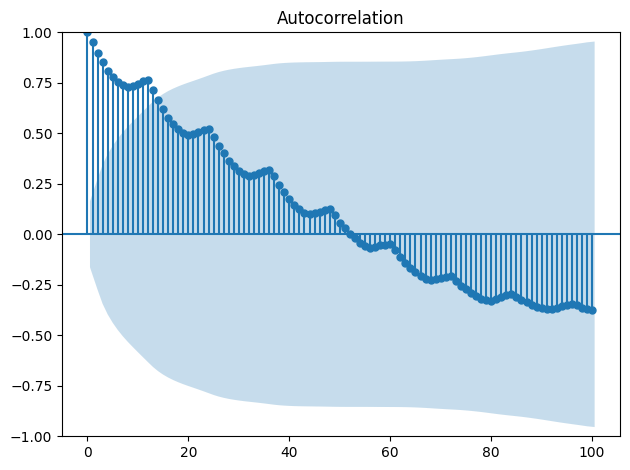

In [31]:
# 정상성 테스트
### 미변환
display('Non-transfer:')
plt.figure(figsize=(12, 8))
df.plot(ax=plt.subplot(222), title='Y', legend=False)
plt.show()

candidate_none = df.copy()
print('H0 of ADF: ', '비정상상태')
print('H0 of KPSS: ', '정상상태')
# display(stationarity_ADF_KPSS(pd.DataFrame(candidate_none.values.flatten())))
plot_acf(candidate_none, lags=100, use_vlines=True)
plt.tight_layout()
plt.show()

### 로그변환
display('Log-transfer:')
plt.figure(figsize=(12, 8))
np.log(df).plot(ax=plt.subplot(222), title='Log(Y)', legend=False)
plt.show()

candidate_trend = np.log(df).copy()
print('H0 of ADF: ', '비정상상태')
print('H0 of KPSS: ', '정상상태')
# display(stationarity_ADF_KPSS(pd.DataFrame(candidate_trend.values.flatten())))
plot_acf(candidate_trend, lags=100, use_vlines=True)
plt.tight_layout()
plt.show()


# trend_diff_order_initial = 0
# result = stationarity_ADF_KPSS(pd.DataFrame(candidate_trend.values.flatten())).T
# if result.loc['Stationarity_ADF', 'p-value'] < 0.1:
#     trend_diff_order = trend_diff_order_initial
# else:
#     trend_diff_order = trend_diff_order_initial + 1
# print('Trend Diff Order: ', trend_diff_order)

# candidate_seasonal = candidate_trend.diff(trend_diff_order).dropna().copy()
# print('H0 of ADF: ', '비정상상태')
# print('H0 of KPSS: ', '정상상태')
# display(stationarity_ADF_KPSS(pd.DataFrame(candidate_seasonal.values.flatten())))
# plot_acf(candidate_seasonal, lags=100, use_vlines=True)
# plt.tight_layout()
# plt.show()

# seasonal_diff_order = int(sm.tsa.acf(candidate_seasonal)[1:].argmax() + 1)
# print('Seasonal Difference: ', seasonal_diff_order)

# ### 로그+추세차분+계절차분 변환
# display('Log and trend+seasonal diffrence transfer:')
# candidate_final = candidate_seasonal.diff(seasonal_diff_order).dropna().copy()
# print('H0 of ADF: ', '비정상상태')
# print('H0 of KPSS: ', '정상상태')
# display(stationarity_ADF_KPSS(pd.DataFrame(candidate_final.values.flatten())))
# plot_acf(candidate_final, lags=100, use_vlines=True)
# plt.tight_layout()
# plt.show()


| **방법론** | **효과** | **항공사 승객수요** | **항공사 승객수요<br>(Log)** | **항공사 승객수요<br>(Log+추세차분)** | **항공사 승객수요<br>(Log+추세차분+계절성차분)** |
|-----|-----|-----|-----|-----|-----|
| **ADF Test<br>(H0: `비정상성`)** | 추세 제거 | 비정상성 | 비정상성 | 비정상성 | `정상성` |
| **KPSS Test<br>(H0: `정상성`)** | 계절성 제거 | 비정상성 | 비정상성 | `정상성` | `정상성` |
| **ACF Plot** | 자기상관 제거 | 비정상성 | 비정상성 | 비정상성 | `정상성` |

# **일반 선형과정 알고리즘(General Linear Process)**

**"시계열 데이터가 `가우시안 백색잡음의 현재값과 과거값의 선형조합`"** 


$$Y_t = \epsilon_t + \psi_1\epsilon_{t-1} + \psi_2\epsilon_{t-2} + \cdots$$
$$\text{where }\epsilon_i \sim i.i.d.~WN(0, \sigma_{\epsilon_i}^2)\text{ and }\displaystyle \sum_{i=1}^{\infty}\psi_i^2 < \infty$$

- **세부 알고리즘:**

    - `White Noise`(WN)

    - `Moving Average`(MA)

    - `Auto-Regressive`(AR)

    - `Auto-Regressive Moving Average`(ARMA)

    - `Auto-Regressive Integrated Moving Average`(ARIMA)

    - `ARIMAX`

    - `Seasonal ARIMA`(SARIMA)

    - `SARIMAX`

## White Noise

<img src='./img/White_Noise.png' width='450'>

**(1) 잔차들은 `정규분포`이고, (unbiased) `평균 0이고 일정한 분산`을 가져야 함:** 

$$
\begin{align*}
\{\epsilon_t : t = \dots, -1, 0, 1, \dots\} & \sim N(0,\sigma^2_{\epsilon_t}) \\
\text{where  } \epsilon_t & \sim \text{i.i.d(independent and identically distributed)} \\
\epsilon_t &= Y_t - \hat{Y_t} \\
E(\epsilon_t) &= 0 \\
Var(\epsilon_t) &= \sigma^2_{\epsilon_t} \\
Cov(\epsilon_s, \epsilon_k) &= 0 \text{ for different times!(s $\ne$ k)}
\end{align*}
$$

**(2) 잔차들이 시간의 흐름에 따라 `상관성이 없어야` 함:** `자기상관함수(Autocorrelation Fundtion, ACF)=0` 확인

- **공분산(Covariance):** 

$$Cov(Y_s, Y_k) = E[(Y_s-E(Y_s))(Y_k-E(Y_k))] = \gamma_{s,k}$$

- **자기상관함수(Autocorrelation Function):** 

$$Corr(Y_s, Y_k) = \dfrac{Cov(Y_s, Y_k)}{\sqrt{Var(Y_s)Var(Y_k)}} = \dfrac{\gamma_{s,k}}{\sqrt{\gamma_s \gamma_k}}$$

- **편자기상관함수(Partial Autocorrelation Function):** $s$와 $k$사이의 `상관성을 제거한 자기상관함수`

$$Corr[(Y_s-\hat{Y}_s, Y_{s-t}-\hat{Y}_{s-t})]  \text{ for } 1<t<k$$

#### 1) 예시: 가우시안 백색잡음

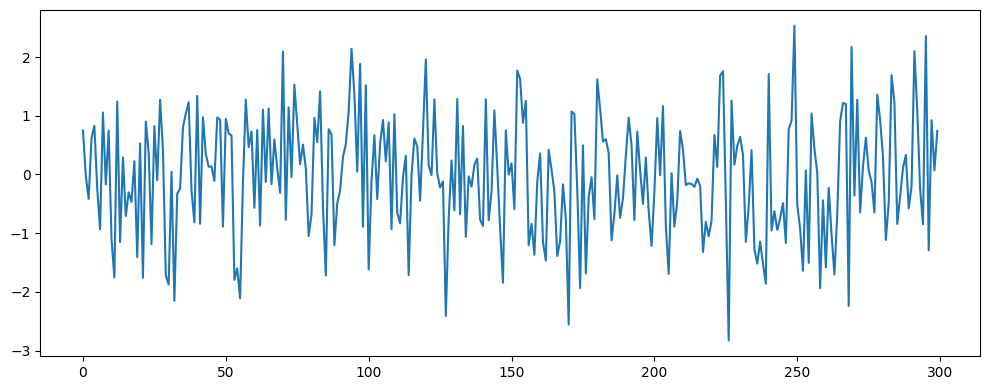

In [32]:
plt.figure(figsize=(10, 4))
plt.plot(stats.norm.rvs(size=300))
plt.tight_layout()
plt.show()

#### 2) 예시: 베르누이 백색잡음

- 백색잡음의 기반 확률분포가 반드시 `정규분포일 필요는 없음`

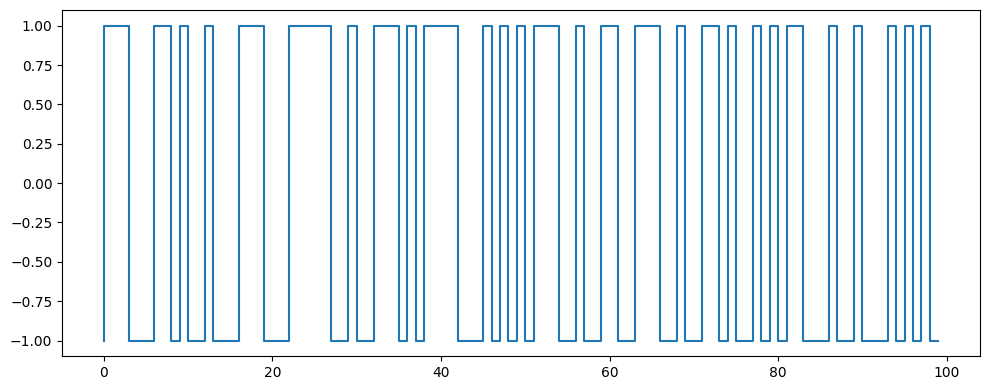

In [33]:
plt.figure(figsize=(10, 4))
samples = stats.bernoulli.rvs(0.5, size=100) * 2 - 1
plt.step(np.arange(len(samples)), samples)
plt.ylim(-1.1, 1.1)
plt.tight_layout()
plt.show()

## Moving Average(MA)

**"$MA(q)$: 알고리즘의 차수($q$)가 `유한한 가우시안 백색잡음과정의 선형조합`"**

- `Exponential Smoothing` 내  Moving Average Smoothing은 `과거의 Trend-Cycle을 추정`

- MA는 `미래 값을 예측`하기 위함

$$Y_t = \epsilon_t + \theta_1\epsilon_{t-1} + \theta_2\epsilon_{t-2} + \cdots + \theta_q\epsilon_{t-q} $$

$$\text{where }\epsilon_i \sim i.i.d.~WN(0, \sigma_{\epsilon_i}^2)\text{ and }\displaystyle \sum_{i=1}^{\infty}\theta_i^2 < \infty$$

$$Y_t = \epsilon_t + \theta_1\epsilon_{t-1} + \theta_2\epsilon_{t-2} + \cdots + \theta_q\epsilon_{t-q}$$
$$= \epsilon_t + \theta_1L\epsilon_t + \theta_2L^2\epsilon_t + \cdots + \theta_qL^q\epsilon_t $$
$$= (1 + \theta_1L + \theta_2L^2 + \cdots + \theta_qL^q)\epsilon_t $$
$$= \theta(L)\epsilon_t $$

$$\text{where }\epsilon_{t-1} = L\epsilon_t\text{ and }\epsilon_{t-2} = L^2\epsilon_t$$

**MA(1)**

\begin{align*}
\text{Main Equation} && Y_t &= \epsilon_t + \theta_1\epsilon_{t-1} \\
\text{Expectation}   && E(Y_t) &= E(\epsilon_t + \theta_1\epsilon_{t-1}) = E(\epsilon_t) + \theta_1E(\epsilon_{t-1}) = 0 \\
\text{Variance}   && Var(Y_t) &= E[(\epsilon_t + \theta_1\epsilon_{t-1})^2] \\
&& &= E(\epsilon_t^2) + 2\theta_1E(\epsilon_{t}\epsilon_{t-1}) + \theta_1^2E(\epsilon_{t-1}^2) \\
&& &= \sigma_{\epsilon_i}^2 + 2 \theta_1 \cdot 0 + \theta_1^2 \sigma_{\epsilon_i}^2 \\
&& &= \sigma_{\epsilon_i}^2 + \theta_1^2\sigma_{\epsilon_i}^2 \\
\text{Covariance} && Cov(Y_t, Y_{t-1}) = \gamma_1 &= \text{E} \left[ (\epsilon_t + \theta_1 \epsilon_{t-1})(\epsilon_{t-1} + \theta_1 \epsilon_{t-2}) \right] \\
&& &= E (\epsilon_t \epsilon_{t-1}) + \theta_1 E (\epsilon_t \epsilon_{t-2}) + \theta_1 E (\epsilon_{t-1}^2) + \theta_1^2 E (\epsilon_{t-1} \epsilon_{t-2}) \\
&& &= 0 + \theta_1 \cdot 0 + \theta_1 \sigma_{\epsilon_{i}}^2 + \theta_1^2 \cdot 0 \\
&& &= \theta_1 \sigma_{\epsilon_{i}}^2   \\
&& Cov(Y_t, Y_{t-2}) = \gamma_2 &= \text{E} \left[ (\epsilon_t + \theta_1 \epsilon_{t-1})(\epsilon_{t-2} + \theta_1 \epsilon_{t-3}) \right] \\
&& &= E (\epsilon_t \epsilon_{t-2}) + \theta_1 E (\epsilon_t \epsilon_{t-3}) + \theta_1 E (\epsilon_{t-1} \epsilon_{t-2}) + \theta_1^2 E (\epsilon_{t-1} \epsilon_{t-3}) \\
&& &= 0 + \theta_1 \cdot 0 + \theta_1 \cdot 0 + \theta_1^2 \cdot 0 \\
&& &= 0 \\
\text{Autocorrelation} && Corr(Y_t, Y_{t-1}) = \rho_1 &= \dfrac{\theta_1}{1+\theta_1^2} \\
&& Corr(Y_t, Y_{t-i}) = \rho_i &= 0~~for~~i > 1 \\
\end{align*}

**MA(2)**  

\begin{align*}
\text{Main Equation} && Y_t &= \epsilon_t + \theta_1\epsilon_{t-1} + \theta_2\epsilon_{t-2} \\
\text{Expectation}   && E(Y_t) &= E(\epsilon_t + \theta_1\epsilon_{t-1} + \theta_2\epsilon_{t-2}) = E(\epsilon_t) + \theta_1E(\epsilon_{t-1}) + \theta_2E(\epsilon_{t-2}) = 0 \\
\text{Variance}   && Var(Y_t) &= E[(\epsilon_t + \theta_1\epsilon_{t-1} + \theta_2\epsilon_{t-2})^2] \\
&& &= \sigma_{\epsilon_i}^2 + \theta_1^2\sigma_{\epsilon_i}^2 + \theta_2^2\sigma_{\epsilon_i}^2 \\
\text{Covariance} && Cov(Y_t, Y_{t-1}) = \gamma_1 &= \text{E} \left[ (\epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2\epsilon_{t-2})(\epsilon_{t-1} + \theta_1 \epsilon_{t-2} + \theta_2\epsilon_{t-3}) \right] \\
&& &= (\theta_1 + \theta_1\theta_2) \sigma_{\epsilon_{i}}^2   \\
&& Cov(Y_t, Y_{t-2}) = \gamma_2 &= \text{E} \left[ (\epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2\epsilon_{t-2})(\epsilon_{t-2} + \theta_1 \epsilon_{t-3} + \theta_2\epsilon_{t-4}) \right] \\
&& &= \theta_2 \sigma_{\epsilon_{i}}^2   \\
&& Cov(Y_t, Y_{t-i}) = \gamma_i &= 0~~for~~i > 2 \\
\text{Autocorrelation} && Corr(Y_t, Y_{t-1}) = \rho_1 &= \dfrac{\theta_1 + \theta_1 \theta_2}{1+\theta_1^2+\theta_2^2} \\
&& Corr(Y_t, Y_{t-2}) = \rho_2 &= \dfrac{\theta_2}{1+\theta_1^2+\theta_2^2} \\
&& Corr(Y_t, Y_{t-i}) = \rho_i &= 0~~for~~i > 2 \\
\end{align*}

**움직임 특성:**

- **Stationarity Condition of MA(1):** $|\theta_1| < 1$ 

- **Stationarity Condition of MA(2):** $|\theta_2| < 1$, $\theta_1 + \theta_2 > -1$, $\theta_1 - \theta_2 < 1$ 

**MA(q):** 

\begin{align*}
\text{Autocorrelation} && Corr(Y_t, Y_{t-i}) = \rho_i &= 
\begin{cases} 
\dfrac{\theta_i + \theta_1\theta_{i-1}  + \theta_2\theta_{i-2} + \cdots + \theta_q\theta_{i-q}}{1 + \theta_1^2 + \cdots  + \theta_q^2} & \text{ for } i= 1, 2, \cdots, q \\ 
0 & \text{ for } i > q \\ 
\end{cases}
\end{align*}

<img src='./img/TS_Estimation_MA.png' width='500'>(https://dinonotes.com/archives/2476)

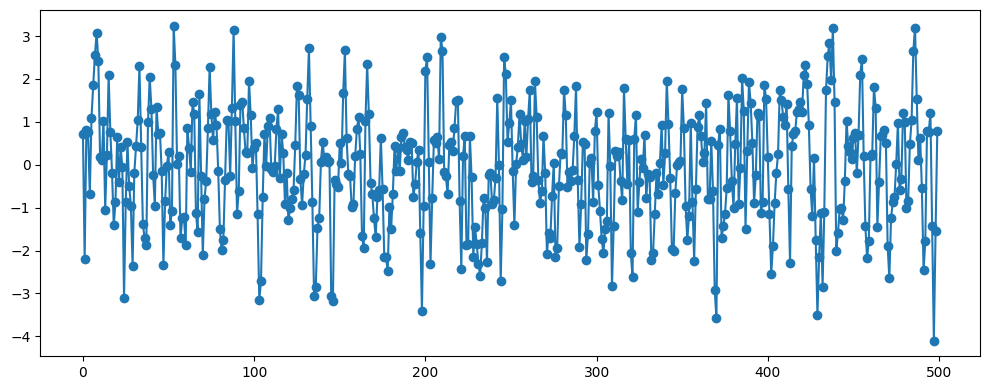

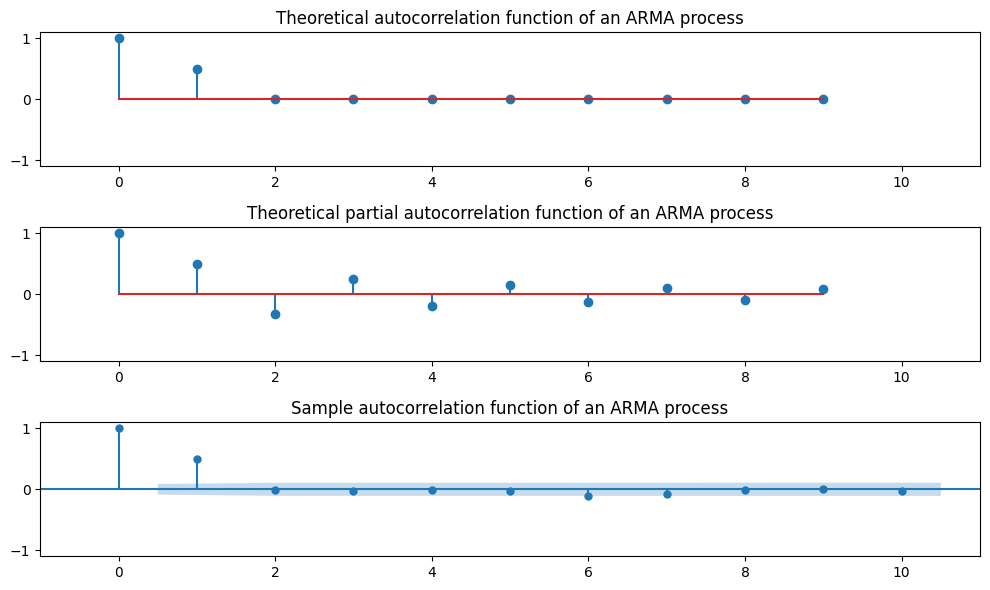

In [35]:
### MA(1)
plt.figure(figsize=(10, 4))
np.random.seed(123)
ar_params = np.array([])
ma_params = np.array([0.9])
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
y = sm.tsa.ArmaProcess(ar, ma).generate_sample(500, burnin=50)
plt.plot(y, 'o-')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.subplot(311)
plt.stem(sm.tsa.ArmaProcess(ar, ma).acf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical autocorrelation function of an ARMA process")

plt.subplot(312)
plt.stem(sm.tsa.ArmaProcess(ar, ma).pacf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical partial autocorrelation function of an ARMA process")

plot_acf(y, lags=10, ax=plt.subplot(313))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Sample autocorrelation function of an ARMA process")
plt.tight_layout()
plt.show()

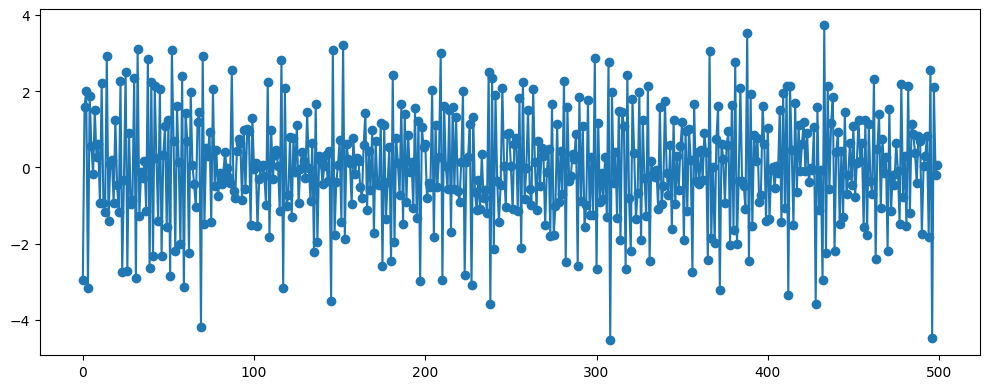

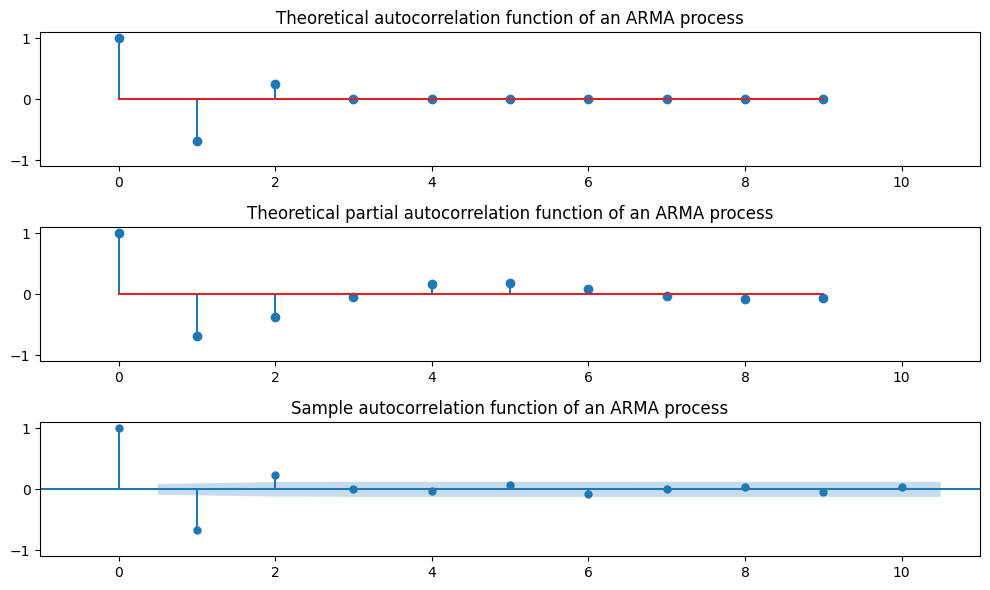

In [36]:
### MA(2)
plt.figure(figsize=(10, 4))
np.random.seed(123)
ar_params = np.array([])
ma_params = np.array([-1, 0.6])
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
y = sm.tsa.ArmaProcess(ar, ma).generate_sample(500, burnin=50)
plt.plot(y, 'o-')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.subplot(311)
plt.stem(sm.tsa.ArmaProcess(ar, ma).acf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical autocorrelation function of an ARMA process")

plt.subplot(312)
plt.stem(sm.tsa.ArmaProcess(ar, ma).pacf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical partial autocorrelation function of an ARMA process")

plot_acf(y, lags=10, ax=plt.subplot(313))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Sample autocorrelation function of an ARMA process")
plt.tight_layout()
plt.show()

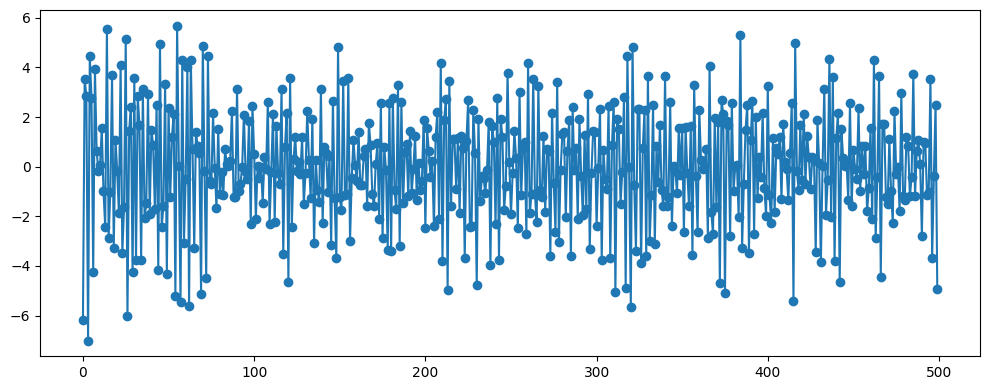

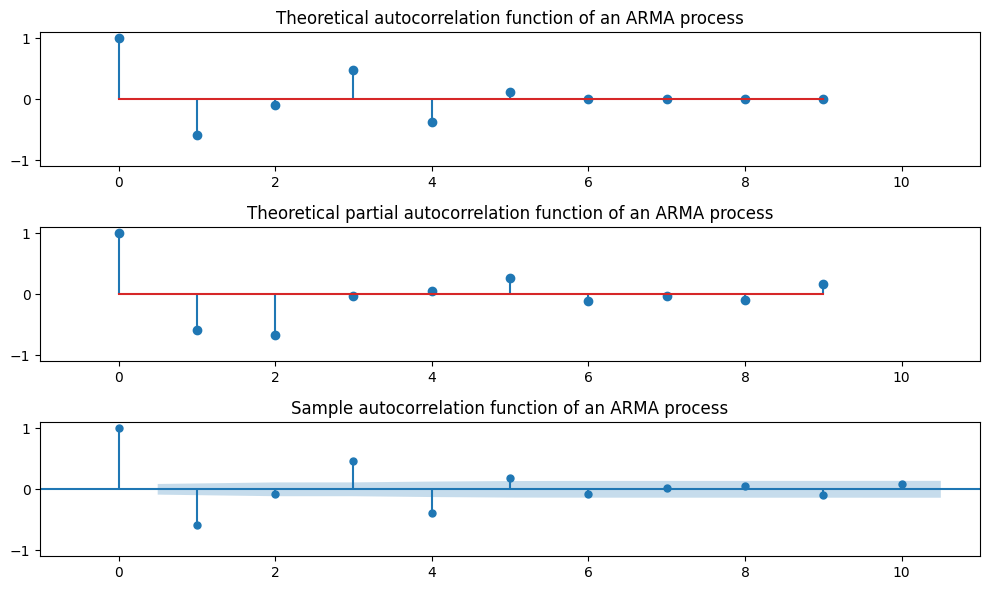

In [37]:
### MA(5)
plt.figure(figsize=(10, 4))
np.random.seed(123)
ar_params = np.array([])
ma_params = np.array([-1, 0.6, 0.9, -1.5, 0.7])
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
y = sm.tsa.ArmaProcess(ar, ma).generate_sample(500, burnin=50)
plt.plot(y, 'o-')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.subplot(311)
plt.stem(sm.tsa.ArmaProcess(ar, ma).acf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical autocorrelation function of an ARMA process")

plt.subplot(312)
plt.stem(sm.tsa.ArmaProcess(ar, ma).pacf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical partial autocorrelation function of an ARMA process")

plot_acf(y, lags=10, ax=plt.subplot(313))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Sample autocorrelation function of an ARMA process")
plt.tight_layout()
plt.show()

## Auto Regressive(AR)

**"$AR(p)$: 알고리즘의 차수($p$)가 `유한한 자기자신의 과거값들의 선형조합`"**

- **필요성:** $MA$모형에서 `ACF가 시차(Lag)가 증가해도 0이 되지 않고 오랜시간 남아있는 경우`에 $MA$모형의 차수가 $\infty$로 감

$$Y_t = \phi_1Y_{t-1} + \phi_2Y_{t-2} + \cdots + \phi_pY_{t-p} + \epsilon_t$$
$$\text{where }\epsilon_i \sim i.i.d.\text{ WN}(0, \sigma_{\epsilon_i}^2)\text{ and }\displaystyle \sum_{i=1}^{\infty}\phi_i^2 < \infty$$
$$
Y_t = \phi_1Y_{t-1} + \phi_2Y_{t-2} + \cdots + \phi_pY_{t-p} + \epsilon_t \\
Y_t - \phi_1Y_{t-1} - \phi_2Y_{t-2} - \cdots - \phi_pY_{t-p} = \epsilon_t \\
Y_t - \phi_1LY_t - \phi_2L^2Y_t - \cdots - \phi_pL^pY_t = \epsilon_t \\
(1 - \phi_1L - \phi_2L^2 - \cdots - \phi_pL^p)Y_t = \epsilon_t \\
\phi(L)Y_t = \epsilon_t \\
$$
$$\text{where }Y_{t-1} = LY_t\text{ and }Y_{t-2} = L^2Y_t
$$

**AR(1):** 

\begin{align*}
\text{Main Equation} && Y_t &= \phi_1 Y_{t-1} + \epsilon_t \\
&& &= \phi_1 (\phi_1 Y_{t-2} + \epsilon_{t-1}) + \epsilon_t \\
&& &= \phi_1^2 Y_{t-2} + \phi_1 \epsilon_{t-1} + \epsilon_t \\
&& &= \phi_1^2  (\phi_1 Y_{t-3} + \epsilon_{t-2}) + \phi_1 \epsilon_{t-1} + \epsilon_t \\
&& &= \phi_1^3 Y_{t-3} + \phi_1^2 \epsilon_{t-2} + \phi_1 \epsilon_{t-1} + \epsilon_t \\
&& & \vdots \\
&& &= \epsilon_t + \phi_1 \epsilon_{t-1} +\phi_1^2 \epsilon_{t-2} + \phi_1^3 \epsilon_{t-3} + \cdots  \\
&& &= MA(\infty) \\
\text{Expectation}   && E(Y_t) &= \mu = E(\phi_1 Y_{t-1} + \epsilon_t) = \phi_1 E(Y_{t-1}) + E(\epsilon_{t}) = \phi_1 \mu + 0 \\
&& (1-\phi_1)\mu &= 0 \\
&& \mu &= 0~~if~~\phi_1 \neq 1 \\
\text{Variance}   && Var(Y_t) &= \gamma_0 = E(Y_t^2) = E[(\phi_1 Y_{t-1} + \epsilon_t)^2] = E[ \phi_1^2  Y_{t-1}^2 + 2\phi_1 Y_{t-1} \epsilon_{t} + \epsilon_{t}^2] \\
&& &= \phi_1^2 E[ Y_{t-1}^2 ] + 2 \phi E[ Y_{t-1} \epsilon_{t} ] + E[ \epsilon_{t}^2 ] \\
&& &= \phi_1^2 \gamma_0 + 0 + \sigma_{\epsilon_i}^2 \\
&& (1-\phi_1^2)\gamma_0 &= \sigma_{\epsilon_i}^2 \\
&& \gamma_0 &= \dfrac{\sigma_{\epsilon_i}^2}{1-\phi_1^2}~~if~~\phi_1^2 \neq 1 \\
\text{Covariance} && Cov(Y_t, Y_{t-1}) &= \gamma_1 = E [(\phi_1 Y_{t-1} + \epsilon_t)(\phi_1 Y_{t-2} + \epsilon_{t-1})] \\
&& &= \phi_1^2E (Y_{t-1} Y_{t-2}) + \phi_1 E (Y_{t-1} \epsilon_{t-1}) + \phi_1 E (\epsilon_{t} Y_{t-2}) + E (\epsilon_{t} \epsilon_{t-1}) \\
&& &= \phi_1^2\gamma_1 + \phi_1 \sigma_{\epsilon_{i}}^2 + \phi_1 \cdot 0 + 0 \\
&& (1 - \phi_1^2)\gamma_1 &= \phi_1 \sigma_{\epsilon_{i}}^2 \\
&& \gamma_1 &= \dfrac{\phi_1 \sigma_{\epsilon_{i}}^2}{1 - \phi_1^2} \\
&& Cov(Y_t, Y_{t-2}) &= \gamma_2 = E [(\phi_1 Y_{t-1} + \epsilon_t)(\phi_1 Y_{t-3} + \epsilon_{t-2})] \\
&& &= \phi_1^2E (Y_{t-1} Y_{t-3}) + \phi_1 E (Y_{t-1} \epsilon_{t-2}) + \phi_1 E (\epsilon_{t} Y_{t-3}) + E (\epsilon_{t} \epsilon_{t-2}) \\
&& &= \phi_1^2\gamma_2 + \phi_1 E[(\phi_1Y_{t-2}+\epsilon_{t-1})\epsilon_{t-2}] + \phi_1 \cdot 0 + 0 \\
&& &= \phi_1^2\gamma_2 + \phi_1^2 E(Y_{t-2}\epsilon_{t-2}) + \phi_1 E(\epsilon_{t-1}\epsilon_{t-2}) \\
&& &= \phi_1^2\gamma_2 + \phi_1^2 \sigma_{\epsilon_{i}}^2 + 0 \\
&& (1 - \phi_1^2)\gamma_2 &= \phi_1^2 \sigma_{\epsilon_{i}}^2 \\
&& \gamma_2 &= \dfrac{\phi_1^2 \sigma_{\epsilon_{i}}^2}{1 - \phi_1^2} \\
\text{Autocorrelation} && Corr(Y_t, Y_{t-1}) = \rho_1 &= \phi_1 \\
&& Corr(Y_t, Y_{t-2}) = \rho_2 &= \phi_1^2 \\
&& Corr(Y_t, Y_{t-i}) = \rho_i &= \phi_1^i \\
\end{align*}


**움직임 특성:**

- $\phi_1 = 0$: $Y_t$는 `백색잡음`  

- $\phi_1 < 0$: `부호를 바꿔가면서(진동하면서)` 지수적으로 감소  

- $\phi_1 > 0$: 시차가 증가하면서 자기상관계수는 `지수적으로 감소`  

- $\phi_1 = 1$: $Y_t$는 비정상성인 `랜덤워크(Random Walk)`

\begin{align*}
Y_t &= Y_{t-1} + \epsilon_t \\
Var(Y_t) &= Var(Y_{t-1} + \epsilon_t) \\
&= Var(Y_{t-1}) + Var(\epsilon_t)  \;\; (\text{independence}) \\
Var(Y_t) &> Var(Y_{t-1})
\end{align*}

- **Stationarity Condition:** $|\phi_1| < 1$

**AR(2):**  

\begin{align*}
\text{Main Equation} && Y_t &= \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \epsilon_t \\
&& &= \phi_1 (\phi_1 Y_{t-2} + \epsilon_{t-1}) + \phi_2 (\phi_2 Y_{t-3} + \epsilon_{t-2}) + \epsilon_t \\
&& &= \phi_1^2 Y_{t-2} + \phi_1 \epsilon_{t-1} + \phi_2^2 Y_{t-3} + \phi_2 \epsilon_{t-2} + \epsilon_t \\
&& &= \phi_1^2 (\phi_1 Y_{t-3} + \phi_2 Y_{t-4} + \epsilon_{t-3}) + \phi_1 \epsilon_{t-1} + 
\phi_2^2 (\phi_1 Y_{t-4} + \phi_2 Y_{t-5} + \epsilon_{t-4}) + \phi_2 \epsilon_{t-2} + \epsilon_t \\
&& & \vdots \\
&& &= \epsilon_t + \phi_1 \epsilon_{t-1} + \phi_2 \epsilon_{t-1} + \phi_1^2 \epsilon_{t-2} + \phi_2^2 \epsilon_{t-2} + \phi_1^3 \epsilon_{t-3} + \phi_2^3 \epsilon_{t-3} + \cdots  \\
&& &= MA(\infty) \\
\text{Expectation}   && E(Y_t) &= \mu = E(\phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \epsilon_t) = \phi_1 E(Y_{t-1}) + \phi_2 E(Y_{t-2}) + E(\epsilon_{t}) = \phi_1 \mu + \phi_2 \mu + 0 \\
&& (1-\phi_1-\phi_2)\mu &= 0 \\
&& \mu &= 0~~if~~\phi_1+\phi_2 \neq 1 \\
\text{Covariance("Yule-Walker Equation")} && \gamma_i &= E(Y_tY_{t-i}) = E[(\phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \epsilon_t)Y_{t-i}] \\
&& &= E(\phi_1 Y_{t-1}Y_{t-i}) + E(\phi_2 Y_{t-2}Y_{t-i}) + E(\epsilon_t Y_{t-i}) \\
&& &= \phi_1 \gamma_{i-1} + \phi_2 \gamma_{i-2} \\
\text{Autocorrelation} && Corr(Y_t, Y_{t-i}) &= \rho_i = \phi_1 \rho_{i-1} + \phi_2 \rho_{i-2} \\
&& \rho_1 &= \phi_1 \rho_{0} + \phi_2 \rho_{-1} = \phi_1 \cdot 1 + \phi_2 \rho_{1} \\
&& (1-\phi_2)\rho_1 &= \phi_1 \\
&& \rho_1 &= \dfrac{\phi_1}{1-\phi_2} \\
&& & \vdots \\
&& \rho_2 &= \dfrac{\phi_1^2 + \phi_2(1-\phi_2)}{1-\phi_2} \\
&& & \vdots \\
&& \rho_i &= \left( 1+\dfrac{1+\phi_2}{1-\phi_2} \cdot i \right)\left(\dfrac{\phi_1}{2} \right)^i \\
\end{align*}

**움직임 특성:**

- 시차가 증가하면서 자기상관계수의 절대값은 `지수적으로 감소`  

- 진동 주파수에 따라 다르지만 `진동 가능`

- **Stationarity Condition:** $|\phi_1| < 1$, $\phi_1 + \phi_2 < 1$, $\phi_2 - \phi_1 < 1$ 

<img src='./img/TS_Estimation_AR.png' width='500'>(https://dinonotes.com/archives/2476)

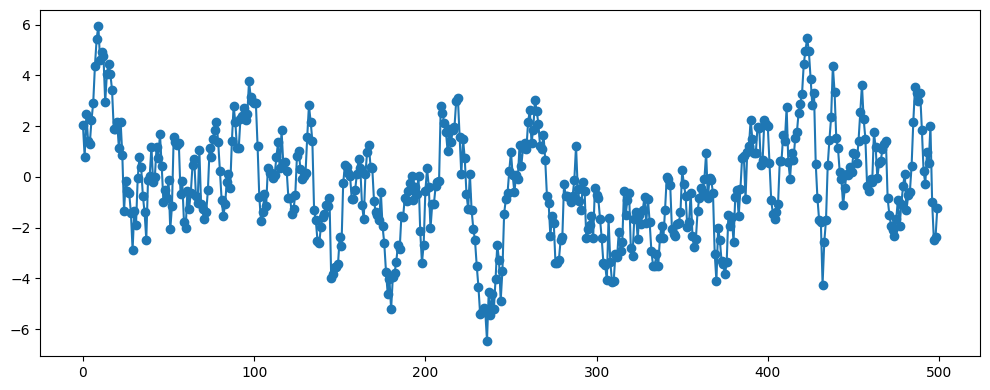

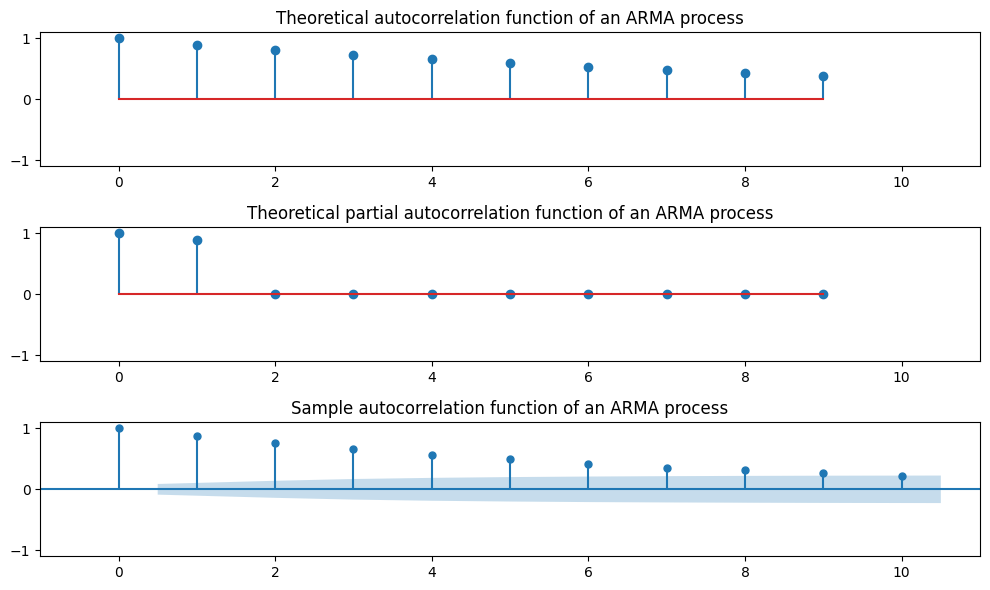

In [38]:
### AR(1)
plt.figure(figsize=(10, 4))
np.random.seed(123)
ar_params = np.array([0.9])
ma_params = np.array([])
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
y = sm.tsa.ArmaProcess(ar, ma).generate_sample(500, burnin=50)
plt.plot(y, 'o-')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.subplot(311)
plt.stem(sm.tsa.ArmaProcess(ar, ma).acf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical autocorrelation function of an ARMA process")

plt.subplot(312)
plt.stem(sm.tsa.ArmaProcess(ar, ma).pacf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical partial autocorrelation function of an ARMA process")

plot_acf(y, lags=10, ax=plt.subplot(313))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Sample autocorrelation function of an ARMA process")
plt.tight_layout()
plt.show()

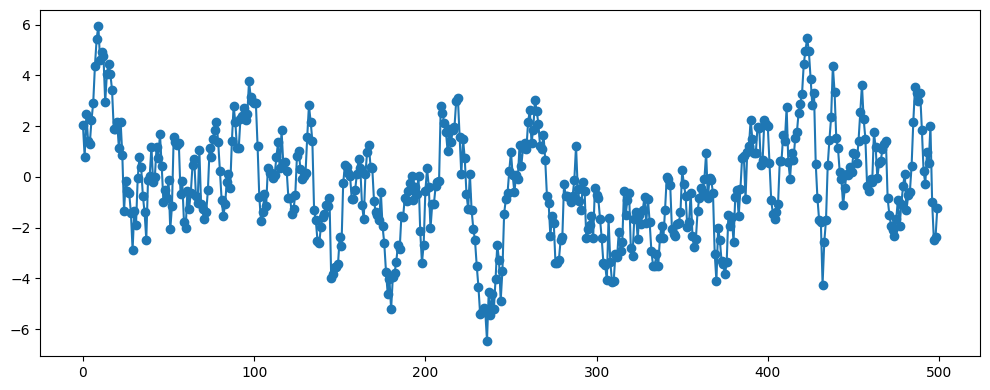

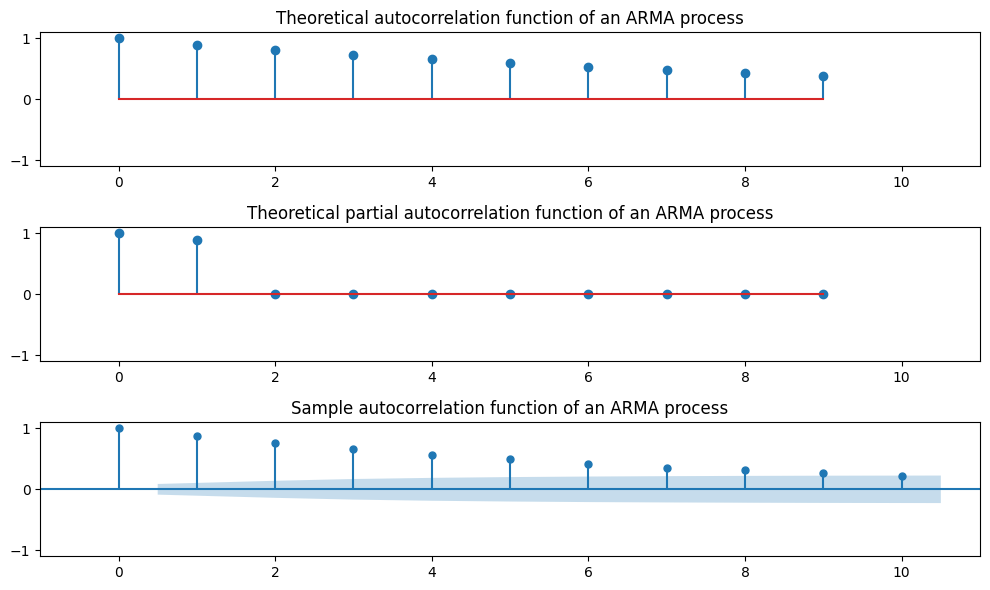

In [39]:
### AR(1)
plt.figure(figsize=(10, 4))
np.random.seed(123)
ar_params = np.array([0.9])
ma_params = np.array([])
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
y = sm.tsa.ArmaProcess(ar, ma).generate_sample(500, burnin=50)
plt.plot(y, 'o-')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.subplot(311)
plt.stem(sm.tsa.ArmaProcess(ar, ma).acf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical autocorrelation function of an ARMA process")

plt.subplot(312)
plt.stem(sm.tsa.ArmaProcess(ar, ma).pacf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical partial autocorrelation function of an ARMA process")

plot_acf(y, lags=10, ax=plt.subplot(313))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Sample autocorrelation function of an ARMA process")
plt.tight_layout()
plt.show()

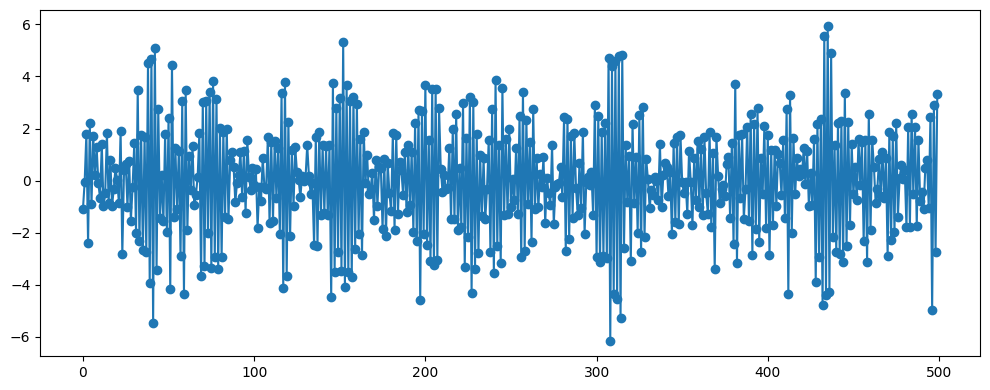

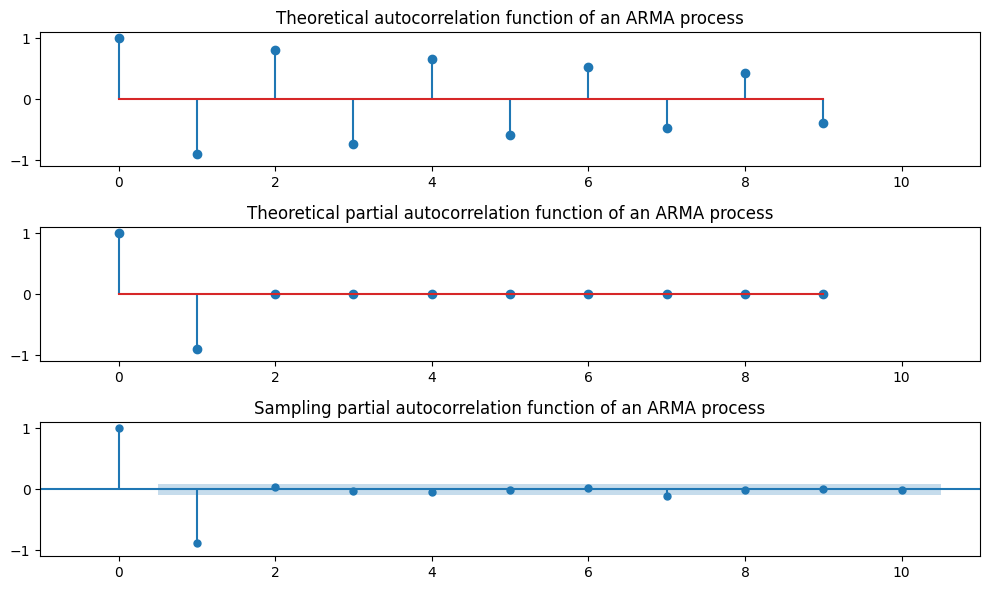

In [40]:
### AR(1)
plt.figure(figsize=(10, 4))
np.random.seed(123)
ar_params = np.array([-0.9])
ma_params = np.array([])
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
y = sm.tsa.ArmaProcess(ar, ma).generate_sample(500, burnin=50)
plt.plot(y, 'o-')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.subplot(311)
plt.stem(sm.tsa.ArmaProcess(ar, ma).acf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical autocorrelation function of an ARMA process")

plt.subplot(312)
plt.stem(sm.tsa.ArmaProcess(ar, ma).pacf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical partial autocorrelation function of an ARMA process")

plot_pacf(y, lags=10, ax=plt.subplot(313))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Sampling partial autocorrelation function of an ARMA process")
plt.tight_layout()
plt.show()

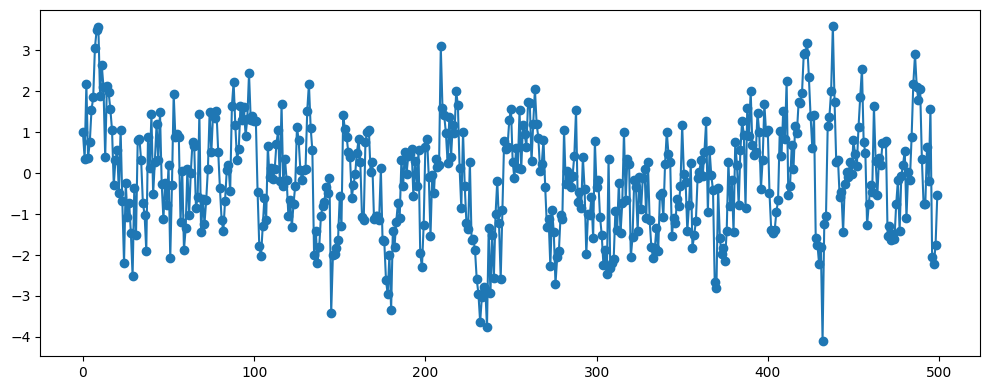

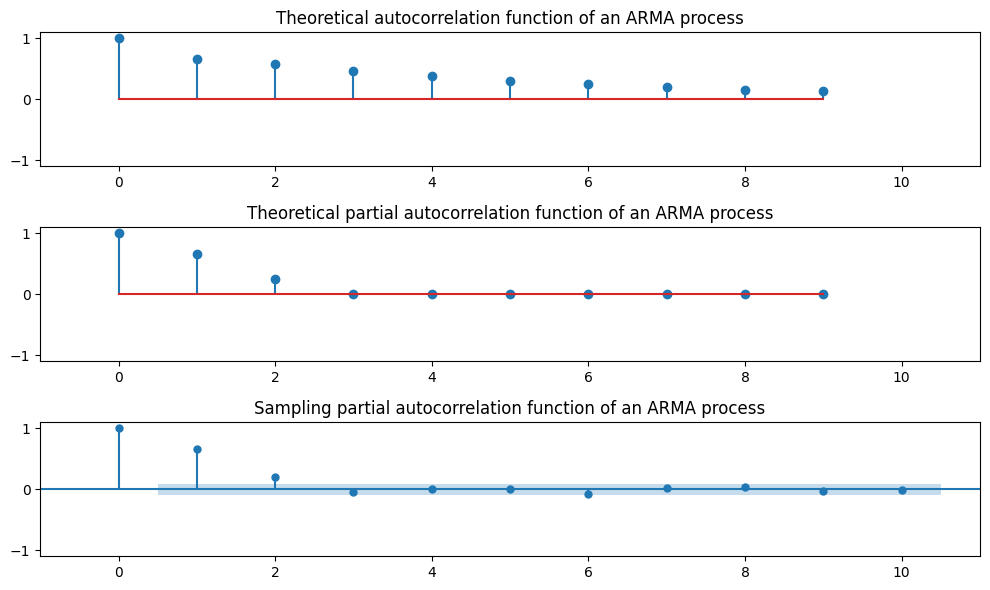

In [41]:
### AR(2)
plt.figure(figsize=(10, 4))
np.random.seed(123)
ar_params = np.array([0.5, 0.25])
ma_params = np.array([])
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
y = sm.tsa.ArmaProcess(ar, ma).generate_sample(500, burnin=50)
plt.plot(y, 'o-')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.subplot(311)
plt.stem(sm.tsa.ArmaProcess(ar, ma).acf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical autocorrelation function of an ARMA process")

plt.subplot(312)
plt.stem(sm.tsa.ArmaProcess(ar, ma).pacf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical partial autocorrelation function of an ARMA process")

plot_pacf(y, lags=10, ax=plt.subplot(313))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Sampling partial autocorrelation function of an ARMA process")
plt.tight_layout()
plt.show()

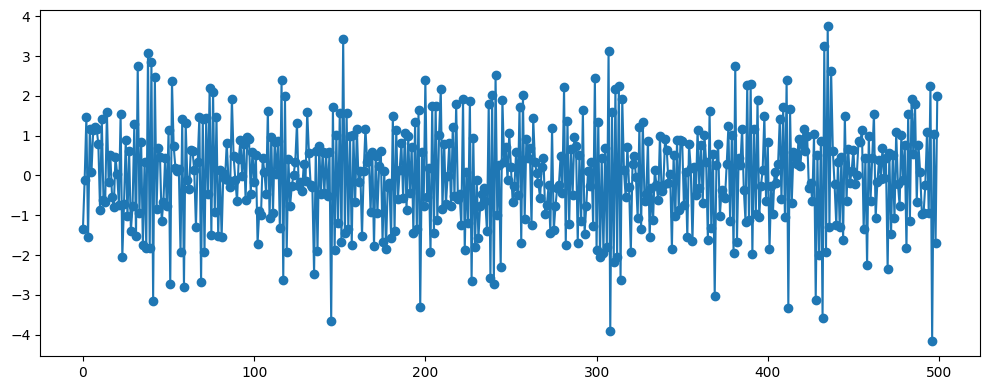

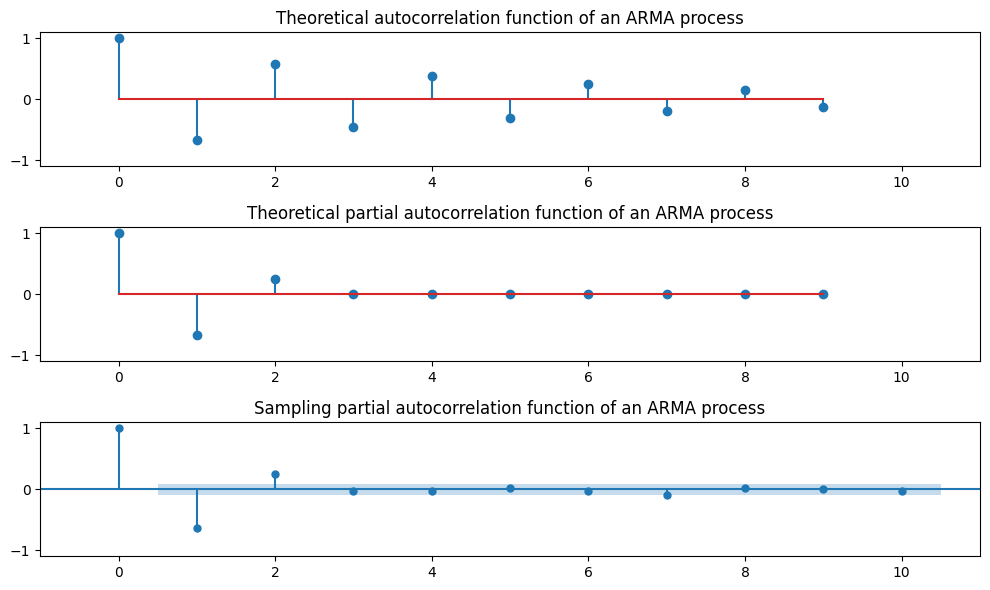

In [42]:
### AR(2)
plt.figure(figsize=(10, 4))
np.random.seed(123)
ar_params = np.array([-0.5, 0.25])
ma_params = np.array([])
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
y = sm.tsa.ArmaProcess(ar, ma).generate_sample(500, burnin=50)
plt.plot(y, 'o-')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.subplot(311)
plt.stem(sm.tsa.ArmaProcess(ar, ma).acf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical autocorrelation function of an ARMA process")

plt.subplot(312)
plt.stem(sm.tsa.ArmaProcess(ar, ma).pacf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical partial autocorrelation function of an ARMA process")

plot_pacf(y, lags=10, ax=plt.subplot(313))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Sampling partial autocorrelation function of an ARMA process")
plt.tight_layout()
plt.show()

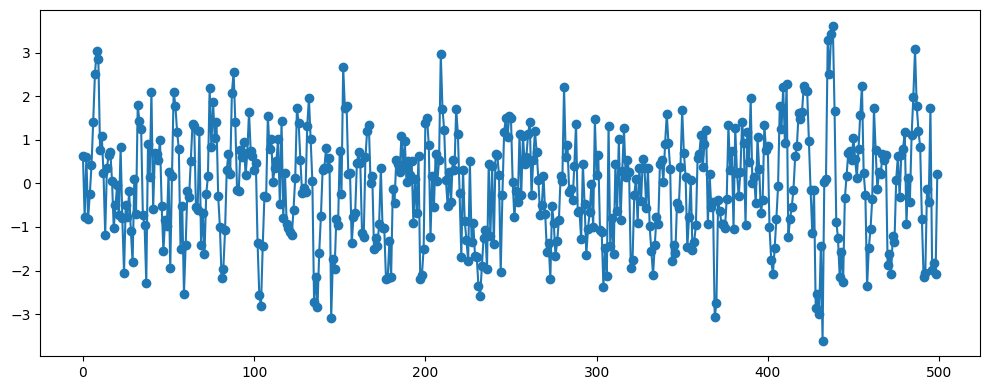

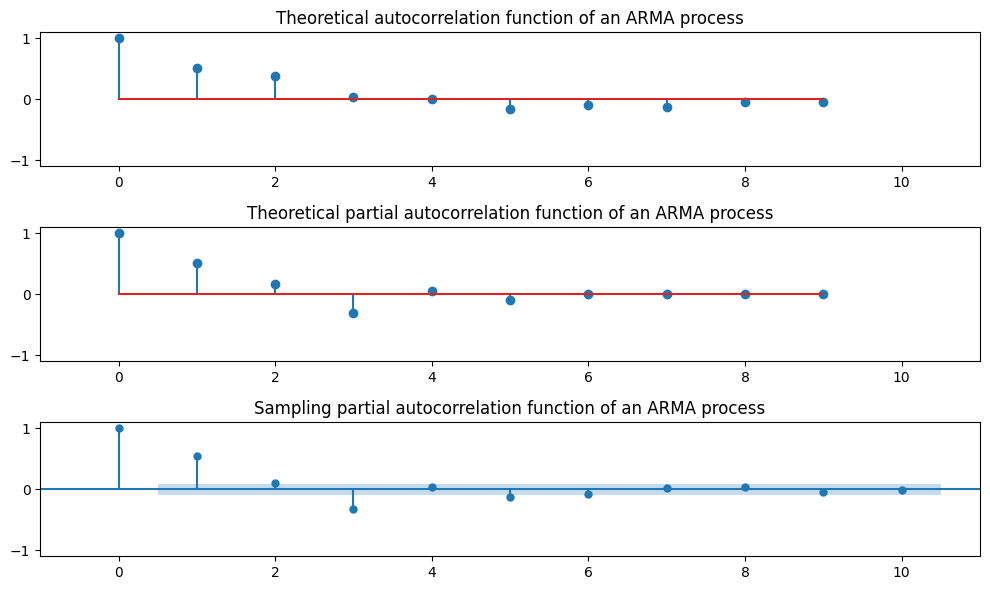

In [43]:
### AR(5)
plt.figure(figsize=(10, 4))
np.random.seed(123)
ar_params = np.array([0.5, 0.25, -0.3, 0.1, -0.1])
ma_params = np.array([])
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
y = sm.tsa.ArmaProcess(ar, ma).generate_sample(500, burnin=50)
plt.plot(y, 'o-')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.subplot(311)
plt.stem(sm.tsa.ArmaProcess(ar, ma).acf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical autocorrelation function of an ARMA process")

plt.subplot(312)
plt.stem(sm.tsa.ArmaProcess(ar, ma).pacf(lags=10))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Theoretical partial autocorrelation function of an ARMA process")

plot_pacf(y, lags=10, ax=plt.subplot(313))
plt.xlim(-1, 11)
plt.ylim(-1.1, 1.1)
plt.title("Sampling partial autocorrelation function of an ARMA process")
plt.tight_layout()
plt.show()

## Relation of MA and AR

- **가역성 조건(Invertibility Condition):**

    - $MA(q)$ -> $AR(\infty)$: 변환 후 `AR 모형이 Stationary Condition이면` `Invertibility` 

    - $AR(p)$ -> $MA(\infty)$: `여러개 모형변환 가능`하지만 `Invertibility` 조건을 만족하는 `MA 모형은 단 1개`만 존재 

## ARMA

**"$ARMA(p,q)$: 알고리즘의 차수($p~and~q$)가 `유한한` $AR(p)$와 $MA(q)$의 `선형조합`"**

- $AR$과 $MA$의 `정상성 조건과 가역성 조건이 동일`하게 $ARMA$ 알고리즘들에 적용  

- 종속변수 $Y_t$는 종속변수 $Y_t$와 백색잡음($\epsilon_t$) `지연변수(Lagged Variables)의 합`으로 예측가능 

$$Y_t = \phi_1Y_{t-1} + \phi_2Y_{t-2} + \cdots + \phi_pY_{t-p} + 
\theta_1\epsilon_{t-1} + \theta_2\epsilon_{t-2} + \cdots + \theta_q\epsilon_{t-q} + \epsilon_t$$
$$
\text{where }\epsilon_i \sim i.i.d.\text{ WN}(0, \sigma_{\epsilon_i}^2)\text{ and }\displaystyle \sum_{i=1}^{\infty}\phi_i^2 < \infty, \displaystyle \sum_{i=1}^{\infty}\theta_i^2 < \infty
$$
$$
\phi(L)Y_t = \theta(L)\epsilon_t \\
Y_t = \dfrac{\theta(L)}{\phi(L)}\epsilon_t \\
$$

----

\begin{align*}
\text{Main Equation} && Y_t &= \dfrac{\theta(L)}{\phi(L)}\epsilon_t \\
&& &= \psi(L)\epsilon_t \text{ where } \psi(L) = \dfrac{\theta(L)}{\phi(L)} \\
&& &= (1 + \psi_1L + \psi_2L^2 + \cdots)\epsilon_t \\
&& &= \epsilon_t + \psi_1\epsilon_{t-1} + \psi_2\epsilon_{t-2} + \cdots \\
&& & \text{ where } \\
&& \psi_1 &= \theta_1 - \phi_1 \\
&& \psi_2 &= \theta_2 - \phi_2 - \phi_1 \psi_1 \\
&& & \vdots \\
&& \psi_j &= \theta_j - \phi_p\psi_{j-p} - \phi_2 \psi_{p-1} - \cdots - \phi_1 \psi_{j-1} \\
\text{Autocorrelation("Yule-Walker Equation")} && \rho_i &= \phi_1 \rho_{i-1} + \cdots + \phi_p \rho_{i-p} \\
\end{align*}